# PROJECT  : Financial Inclusion in Africa

## Compiled by: Mashele G.P

## Project overview/Description
Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

## Data Description
Country:Country interviewee is in. <br>
Year:Year survey was done in. <br>
UniqueID:Unique identifier for each interviewee. <br>
Location_type:Type of location: Rural, Urban <br>
Cellphone_access:If interviewee has access to a cellphone: Yes, No. <br>
Household_size/Size :Number of people living in one house. <br>
Age_of_respondent/Age:The age of the interviewee. <br>
Gender_of_respondent/Gender:	Gender of interviewee: Male, Female. <br>
Relationship_with_head/Relationshi:	The interviewee's relationship with the head of the house: Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know. <br>
Marital_status/Status:	The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know. <br>
Education_level:	Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA <br>
Job_type:Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer. <br>

### Import the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (mean_absolute_error,f1_score,accuracy_score,recall_score, precision_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To be used for data scaling 
from sklearn.preprocessing import StandardScaler
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier,BaggingClassifier,)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Now lets read the train and test  dataset
train_data = pd.read_csv("Banking_train_data.csv",sep=";")
test_data = pd.read_csv("Banking_test_data.csv",sep=";")

In [3]:
# Print the first five rows of the  train dataset
train_data.head()  

,Country,Year,UniqueID,Bank_account,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Print the last five rows of the dataset
train_data.tail()

,Country,Year,UniqueID,Bank_account,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
train_data.shape

(23524, 13)

In [6]:
print(f" The banking  training dataset consist of {train_data.shape[0]} rows and {train_data.shape[1]} columns")

 The banking  training dataset consist of 23524 rows and 13 columns


In [7]:
test_data.head()

,Country,Year,UniqueID,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           10086 non-null  object
 1   Year              10086 non-null  int64 
 2   UniqueID          10086 non-null  object
 3   Location_type     10086 non-null  object
 4   Cellphone_access  10086 non-null  object
 5   Size              10086 non-null  int64 
 6   Age               10086 non-null  int64 
 7   Gender            10086 non-null  object
 8   Relationship      10086 non-null  object
 9   Status            10086 non-null  object
 10  Education_level   10086 non-null  object
 11  Job_type          10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


In [9]:
test_data.shape

(10086, 12)

In [10]:
test_data.head()

,Country,Year,UniqueID,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [11]:
print(f" The banking  testing dataset consist of {test_data.shape[0]} rows and {test_data.shape[1]} columns")

 The banking  testing dataset consist of 10086 rows and 12 columns


In [12]:
# Code to display the dataset data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           23524 non-null  object
 1   Year              23524 non-null  int64 
 2   UniqueID          23524 non-null  object
 3   Bank_account      23524 non-null  object
 4   Location_type     23524 non-null  object
 5   Cellphone_access  23524 non-null  object
 6   Size              23524 non-null  int64 
 7   Age               23524 non-null  int64 
 8   Gender            23524 non-null  object
 9   Relationship      23524 non-null  object
 10  Status            23524 non-null  object
 11  Education_level   23524 non-null  object
 12  Job_type          23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


### Observation:
* The financial sector training dataset consist of 23524 rows and 13 columns. <br>
* 3 of those columns are integer data types. <br>
* 10(ten) are object data types. <br>
*  memory usage is 2.3 MB(Megabytes).

In [13]:
## Drop the year column
train_data=train_data.drop(columns=["Year","UniqueID"],axis=1)

In [14]:
# Now lets recheck the dimensions of the train dataset
train_data.shape

(23524, 11)

In [15]:
 # Code to print the statistical summary of the numerical columns in a  dataset
train_data.describe().T  

,count,mean,std,min,25%,50%,75%,max
Size,23524.000,3.797,2.228,1.000,2.000,3.000,5.000,21.000
Age,23524.000,38.805,16.521,16.000,26.000,35.000,49.000,100.000


### Observation:
* The age and size  dataset are skewed to the right with mean greater than the median.
* 75% of the household size is  5 and above.
* 25% of the household are aged from 26 years and above.
* The banking dataset has interviewee with age that range from a minimum of 16 to a maximum of 100 years.

In [16]:
# code to check for missing values in a dataset
train_data.isnull().sum()

Country             0
Bank_account        0
Location_type       0
Cellphone_access    0
Size                0
Age                 0
Gender              0
Relationship        0
Status              0
Education_level     0
Job_type            0
dtype: int64

###  Observation:
* There are no missing values in the dataset.

In [17]:
# Code to check for duplicates in the dataset
train_data.duplicated().sum()

4429

In [18]:
train_data=train_data.drop_duplicates()

In [19]:
# Code to drop the duplicates in the dataset
train_data.duplicated().sum()

0

###  Observation:
* There are no duplicates in a dataset

# Exploratory data analysis(EDA)

In [20]:
# Code to make a copy of the original  train dataset
data = train_data.copy() 

In [21]:
data.shape

(19095, 11)

## Univariate data analysis

### Numerical data

In [22]:
# Select numerical colums from the dataset
numerical_columns =data.select_dtypes("number").columns

In [23]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Histogram for {item}")      # Give the graph a title
    plt.xlabel(item)  # change the label on the x-axis
    plt.ylabel("frequency")  # change the label on the y-axis
    sns.histplot(data=data,x=item,kde=False);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Boxplot for {item}")          # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);  # Boxplot for numerical dataset
    plt.xlabel(item)                     # change the label on the x-axis
    plt.show()

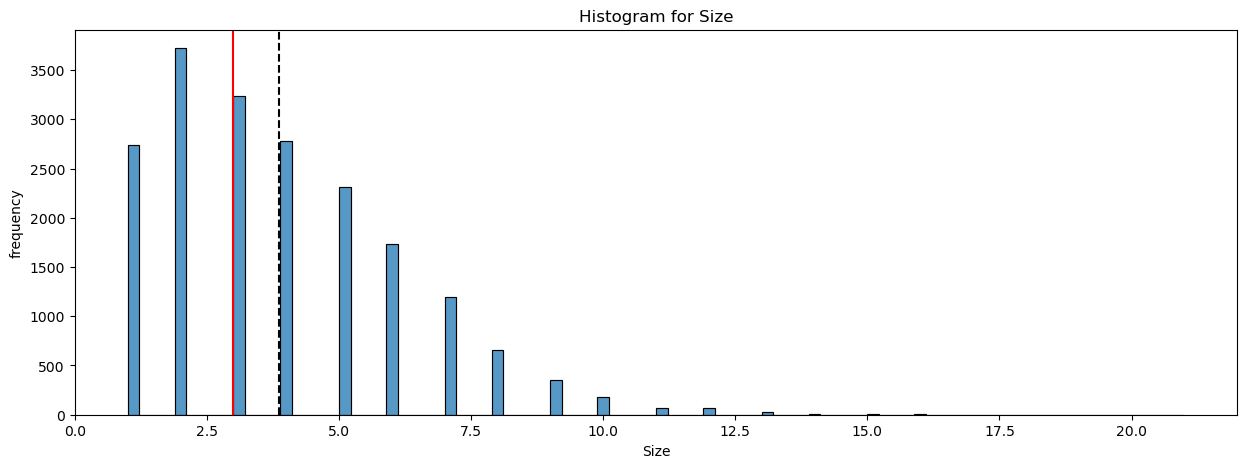

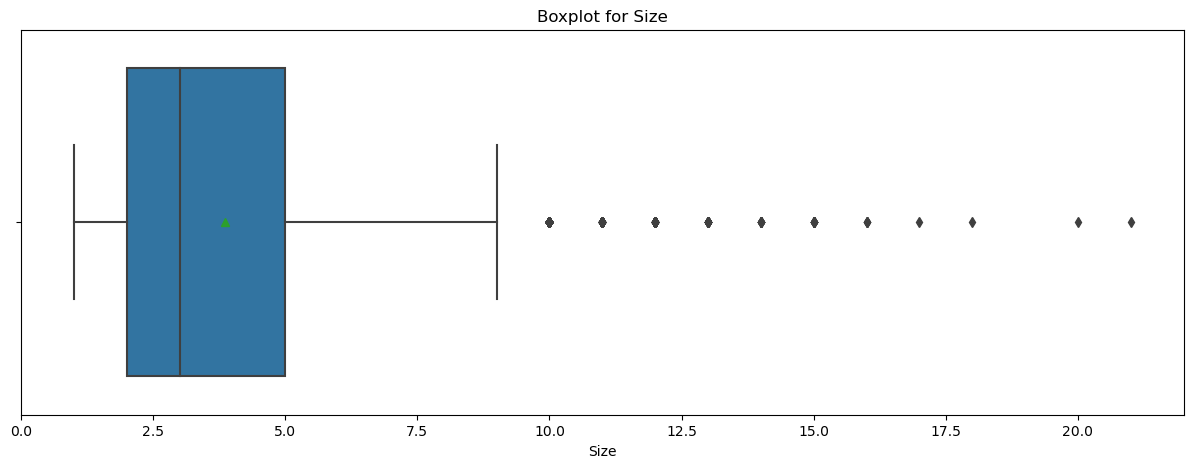

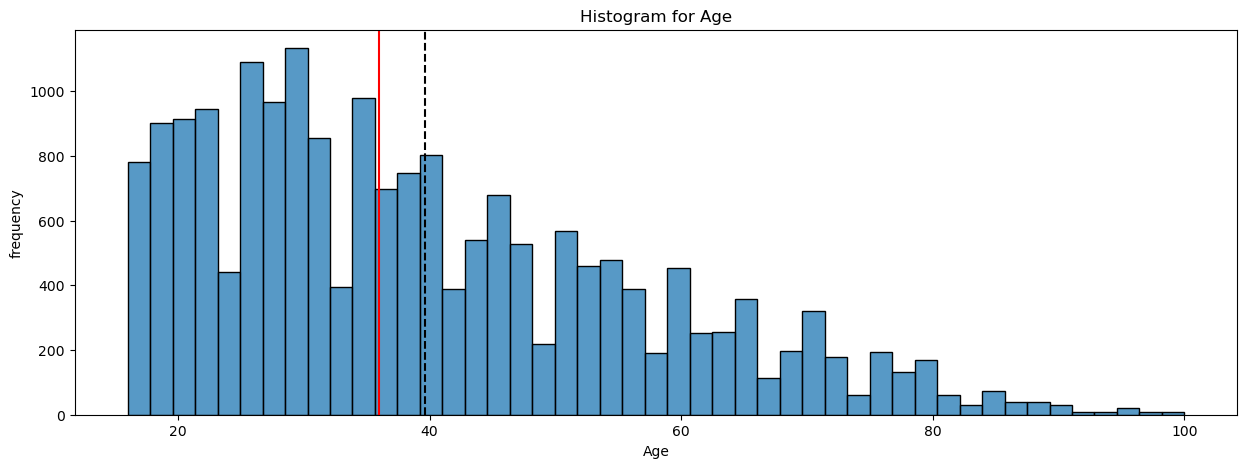

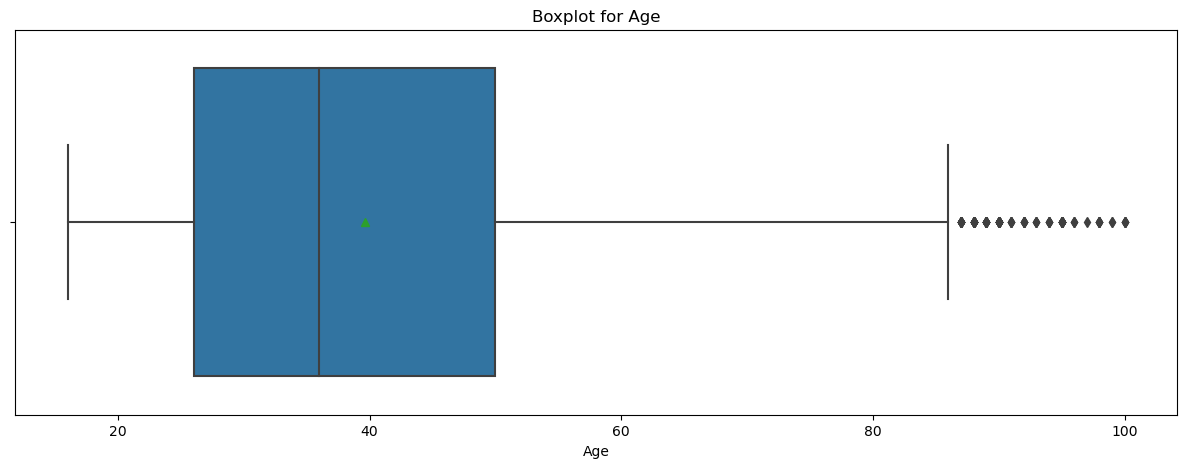

In [24]:
# Code the call the function to display the histogram and boxplots for numericl columns
for item in data[numerical_columns]:
    box_histplot(data,item)

## Categorical data analysis:

In [27]:
# Code to select categorical columns
categorical_data = data.select_dtypes("object").columns  

In [28]:
categorical_data

Index(['Country', 'Bank_account', 'Location_type', 'Cellphone_access',
       'Gender', 'Relationship', 'Status', 'Education_level', 'Job_type'],
      dtype='object')

In [29]:
## Create a function to display the bar graphs for categorical data columns
def count_plot(data,item):
    plt.figure(figsize=(5,4))  # increase the size of the plot
    sns.countplot(data=data , x=item); # countplot for categorical columns
    plt.title(f"Countplot for {item}")  # add the title on the countplot
    plt.ylabel("frequency")    # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

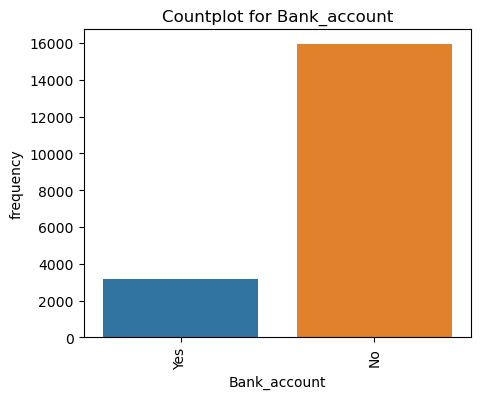

In [30]:
# Print the countplot for attrition
count_plot(data,"Bank_account")

In [31]:
data["Bank_account"].value_counts(normalize=True)

No    0.835
Yes   0.165
Name: Bank_account, dtype: float64

In [32]:
### Construct a pie chart for the attrition data
values=[]  # create an empty list
Bank_account=["Yes","No"]
for item in Bank_account:
    count1= (data[data["Bank_account"]==item].value_counts().sum())/data["Bank_account"].shape[0]
    values.append(count1)

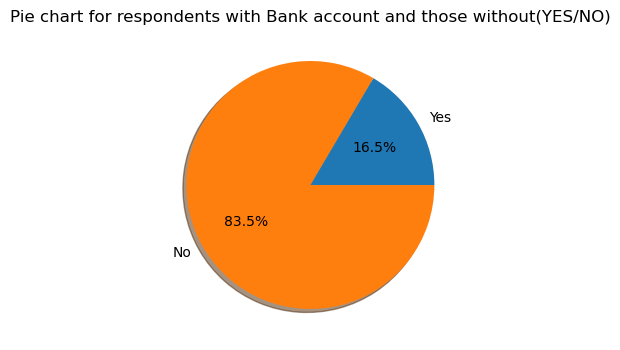

In [33]:
# Create a pie chart to show the percentage for bank account
plt.figure(figsize=(4,5))
plt.pie(values,labels=Bank_account,autopct="%1.1f%%",shadow=True)
plt.title("Pie chart for respondents with Bank account and those without(YES/NO)")
plt.show()

### Observation
About 86% of the banking data indicate that individuals have no banking accounts whereas 14% does have a bank account. <br>
The target columns consist of unbalanced labels

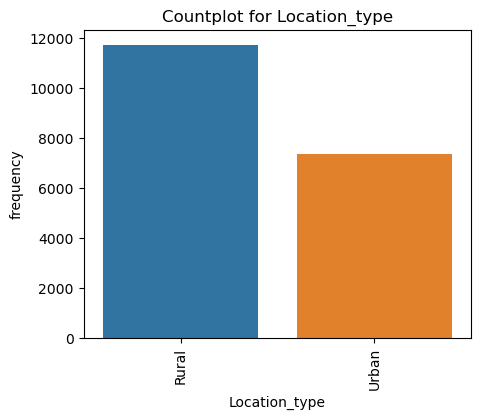

In [34]:
# Print the countplot for loaction types
count_plot(data,"Location_type")

In [35]:
data["Location_type"].value_counts(normalize=True)

Rural   0.615
Urban   0.385
Name: Location_type, dtype: float64

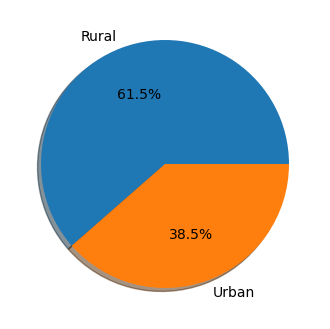

In [36]:
# Create a pie chart to show the percentage for Business Travel 
plt.figure(figsize=(4,5))
values = data["Location_type"].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.show()

### Observation
About 61% of the respondent are from rural areas. <br>
39% are from Urban areas

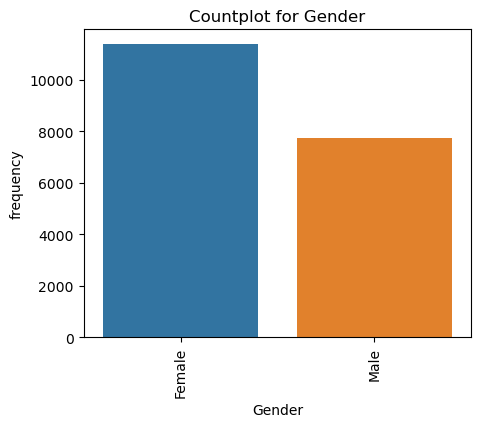

In [37]:
# Print the countplot gender
count_plot(data,"Gender")

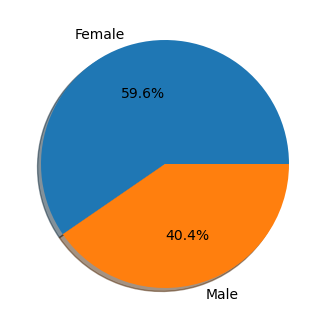

In [38]:
# Create a pie chart to show the percentage for Department 
plt.figure(figsize=(4,5))
values = data["Gender"].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.show()

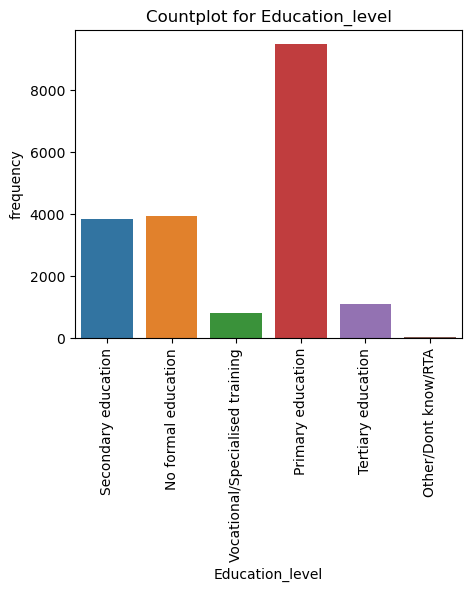

In [39]:
# Print the countplot for education field for employees
count_plot(data,"Education_level")

In [40]:
data["Education_level"].value_counts()

Primary education                  9452
No formal education                3917
Secondary education                3827
Tertiary education                 1080
Vocational/Specialised training     785
Other/Dont know/RTA                  34
Name: Education_level, dtype: int64

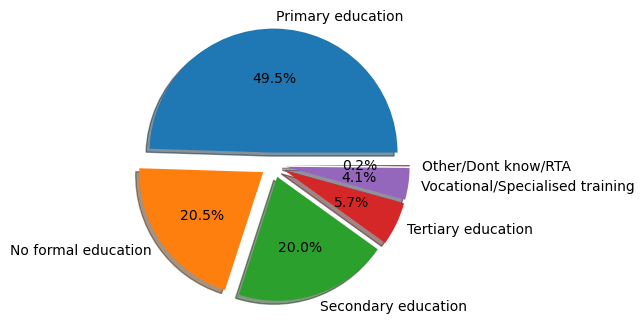

In [41]:
# Create a pie chart to show the percentage for Educational field 
plt.figure(figsize=(4,5))
values = data["Education_level"].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",explode=(0.1,0.1,0.1,0.1,0.1,0.1),shadow=True)
plt.show()

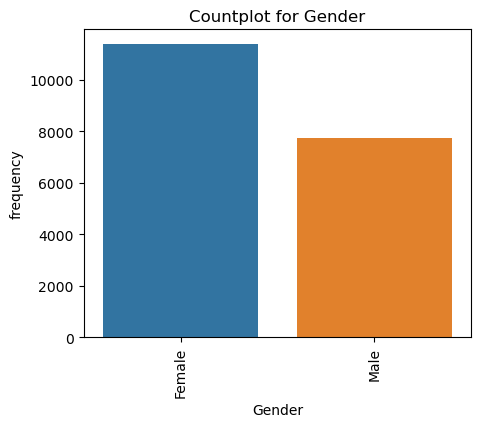

In [42]:
# Print countplot for Gender of employees
count_plot(data,"Gender")

In [43]:
data["Gender"].value_counts()

Female    11377
Male       7718
Name: Gender, dtype: int64

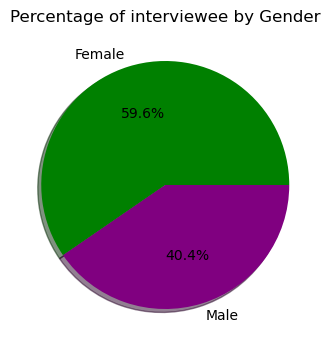

In [44]:
# Create a pie chart to show the percentage for Gender
plt.figure(figsize=(4,5))
values = data["Gender"].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",colors=["green","purple"],shadow=True)
plt.title("Percentage of interviewee by Gender")
plt.show()

### Observation
60% of the employees in the company are males and 40% are females.

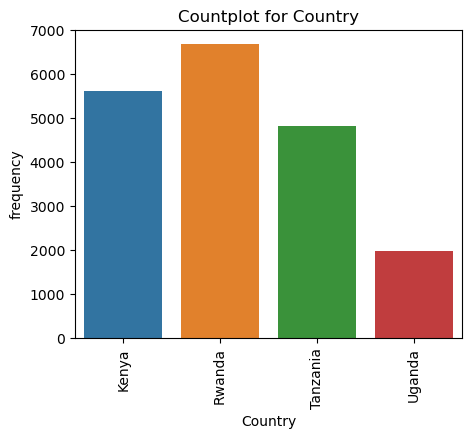

In [45]:
# print the countplot for countries
count_plot(data,"Country")

In [46]:
data["Country"].value_counts(normalize=True)*100

Rwanda     34.973
Kenya      29.416
Tanzania   25.268
Uganda     10.343
Name: Country, dtype: float64

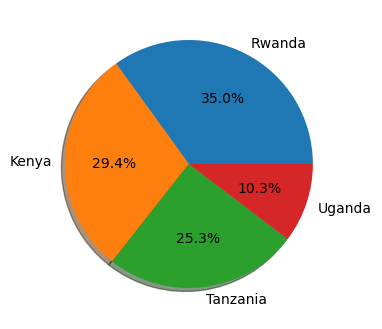

In [47]:
# Create a pie chart to show the percentage for country
plt.figure(figsize=(4,5))
values = data["Country"].value_counts() /data.shape[0]
plt.pie(values,labels= values.keys(),autopct="%1.1f%%",shadow=True)
plt.show()

### Observation
* 37% of the respondent are from Rwanda. <br>
* The least respondent interviewed are from Uganda. 

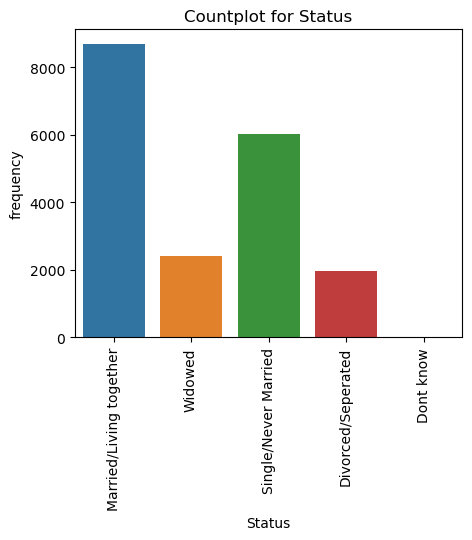

In [48]:
# print the countplot for respondent marital status
count_plot(data,"Status")

In [49]:
data["Status"].value_counts(normalize=True)

Married/Living together   0.455
Single/Never Married      0.315
Widowed                   0.127
Divorced/Seperated        0.103
Dont know                 0.000
Name: Status, dtype: float64

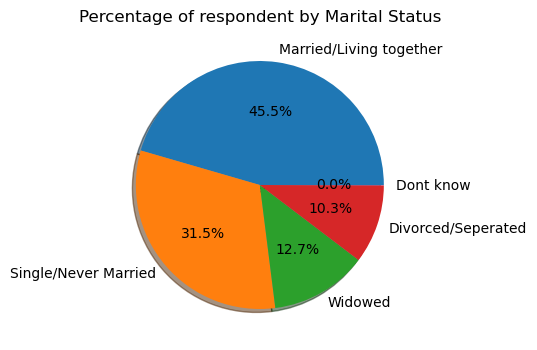

In [50]:
# Create a pie chart to show the percentage for marital status
plt.figure(figsize=(4,5))
values = data["Status"].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of respondent by Marital Status")
plt.show()

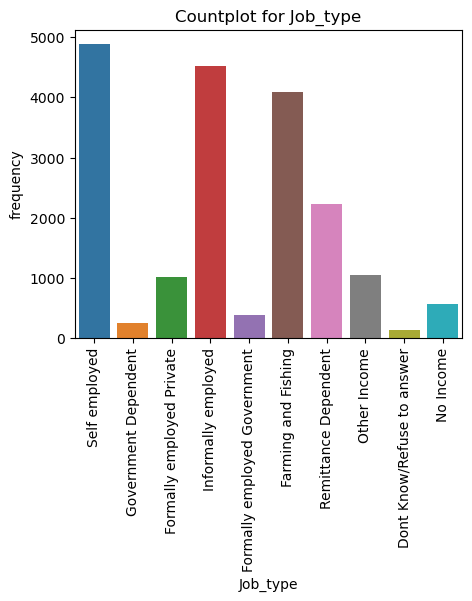

In [51]:
# print the countplot for respondents Job type
count_plot(data,"Job_type")

In [52]:
round(data["Job_type"].value_counts(normalize=True)*100,2)

Self employed                  25.560
Informally employed            23.690
Farming and Fishing            21.460
Remittance Dependent           11.630
Other Income                    5.500
Formally employed Private       5.300
No Income                       2.950
Formally employed Government    1.980
Government Dependent            1.260
Dont Know/Refuse to answer      0.660
Name: Job_type, dtype: float64

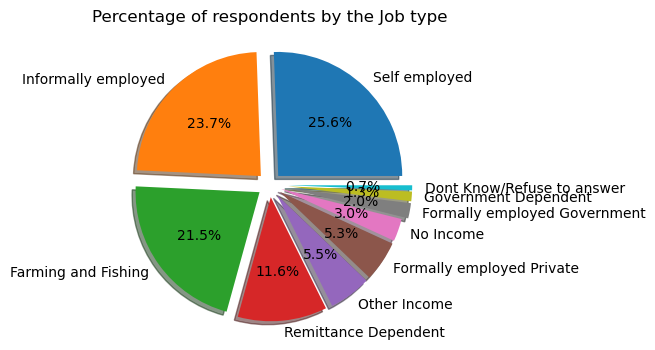

In [53]:
# Create a pie chart to show the percentage for job type
plt.figure(figsize=(4,5))
values = data["Job_type"].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.15,0.15,0.15),shadow=True)
plt.title("Percentage of respondents by the Job type")
plt.show()

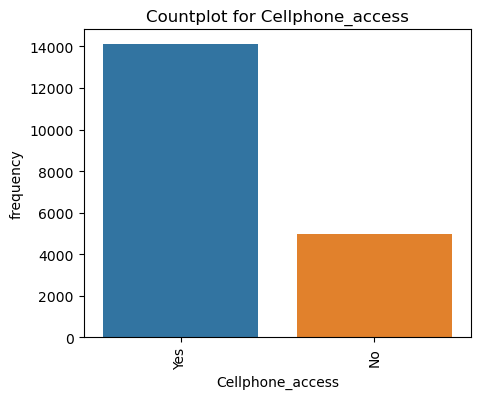

In [54]:
# print the countplot for respondents Job type
count_plot(data,"Cellphone_access")

In [55]:
 round(data["Cellphone_access"].value_counts(normalize=True)*100,2)

Yes   73.890
No    26.110
Name: Cellphone_access, dtype: float64

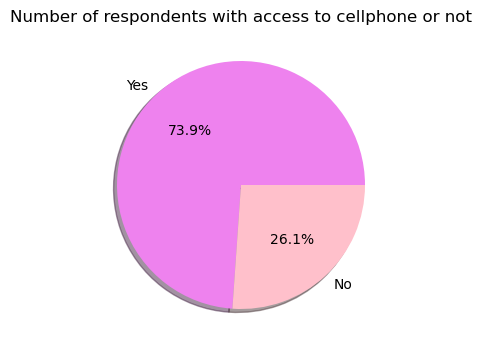

In [56]:
# Create a pie chart to show the percentage for job type
plt.figure(figsize=(4,5))
values = data["Cellphone_access"].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",colors=["violet","pink"],shadow=True)
plt.title("Number of respondents with access to cellphone or not")
plt.show()

### Observation
74% of the interviewee have access to cellphones with 26% that are without cellphones.

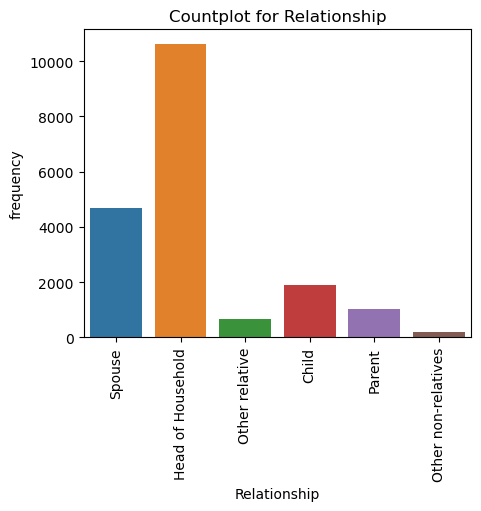

In [57]:
# print the countplot for relationship 
count_plot(data,"Relationship")

In [58]:
round(data["Relationship"].value_counts(normalize=True)*100,2)

Head of Household     55.610
Spouse                24.600
Child                  9.980
Parent                 5.380
Other relative         3.440
Other non-relatives    0.980
Name: Relationship, dtype: float64

## Bivariate data analysis:

#### Categorical and Numerical data analysis

In [60]:
## Create a function to display boxplots for numerical and categorical dataset
def box_plot(data,item_1,categorical_item):
    plt.figure(figsize=(15,7))  # Increase the size of the plot
    sns.boxplot(data=data,x = item_1, y = categorical_item, palette = "Paired_r") 
    plt.title(f"The boxplot for {item_1} relative to {categorical_item}")
    plt.xlabel(item_1)
    plt.ylabel(categorical_item)
    plt.show()

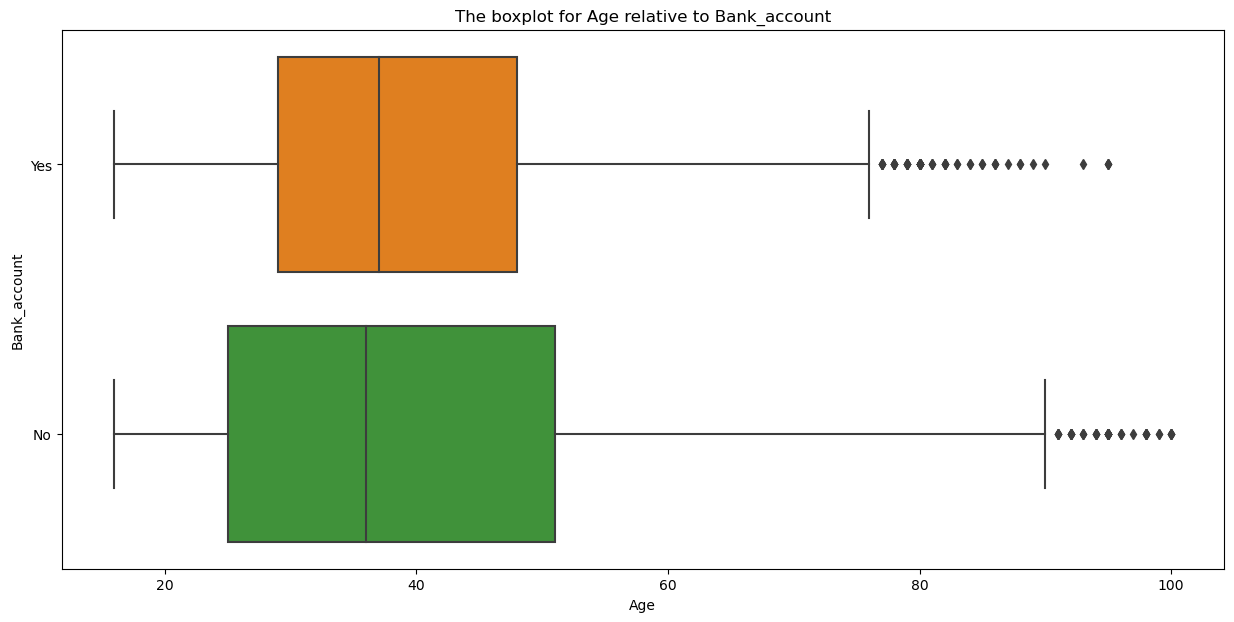

In [61]:
# Boxplot for Age relative to bank account 
box_plot(data,"Age","Bank_account")

### Observation:


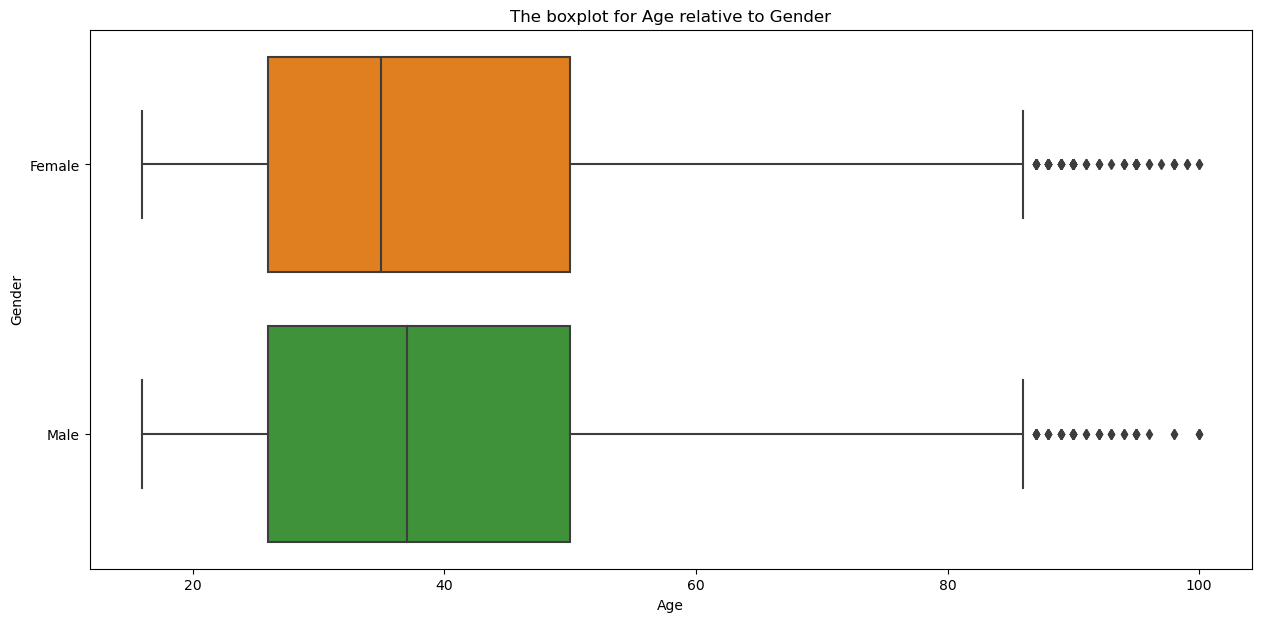

In [62]:
# Boxplot for Age relative to gender
box_plot(data,"Age","Gender")

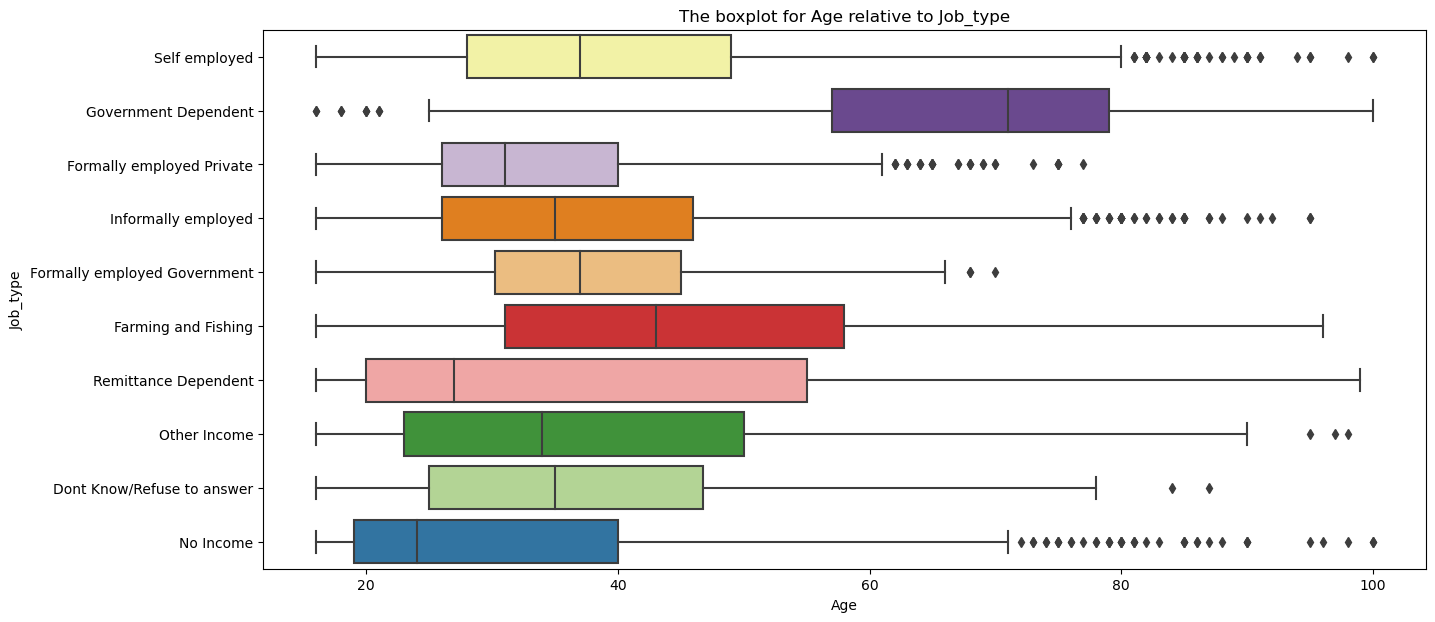

In [63]:
# Boxplot for Age relative to job type
box_plot(data,"Age","Job_type")

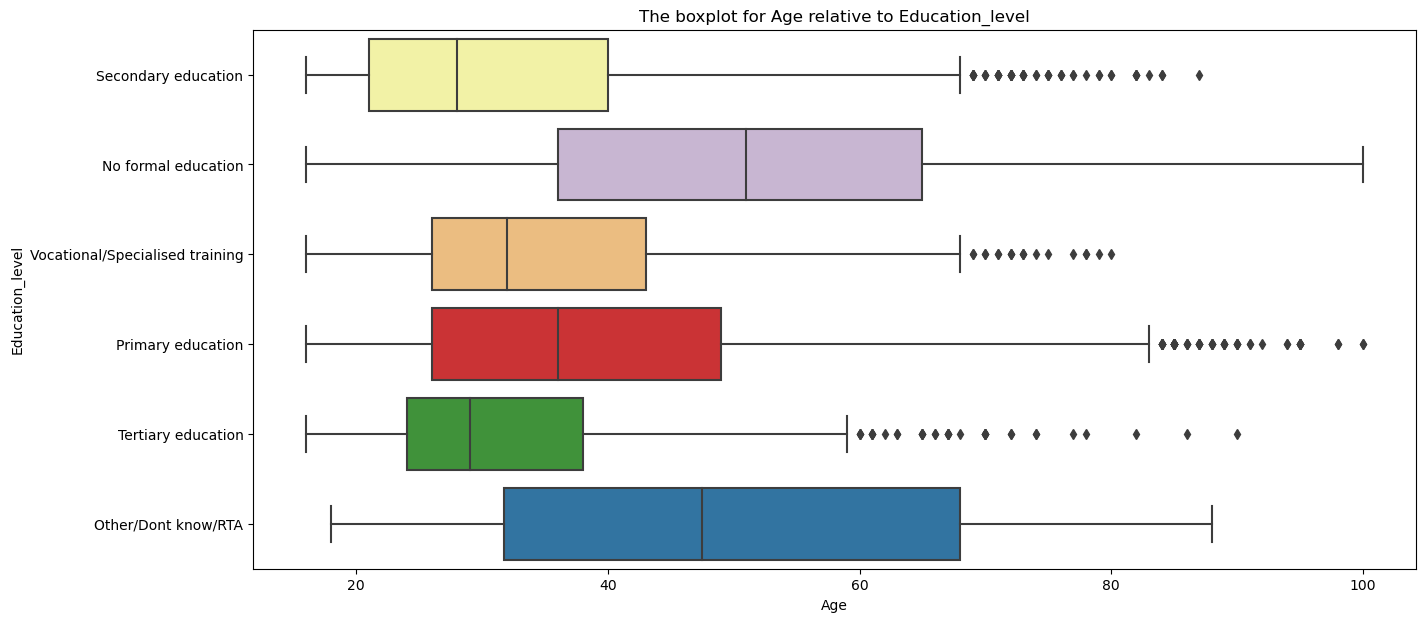

In [64]:
# Boxplot for Age relative to Education level.
box_plot(data,"Age","Education_level")

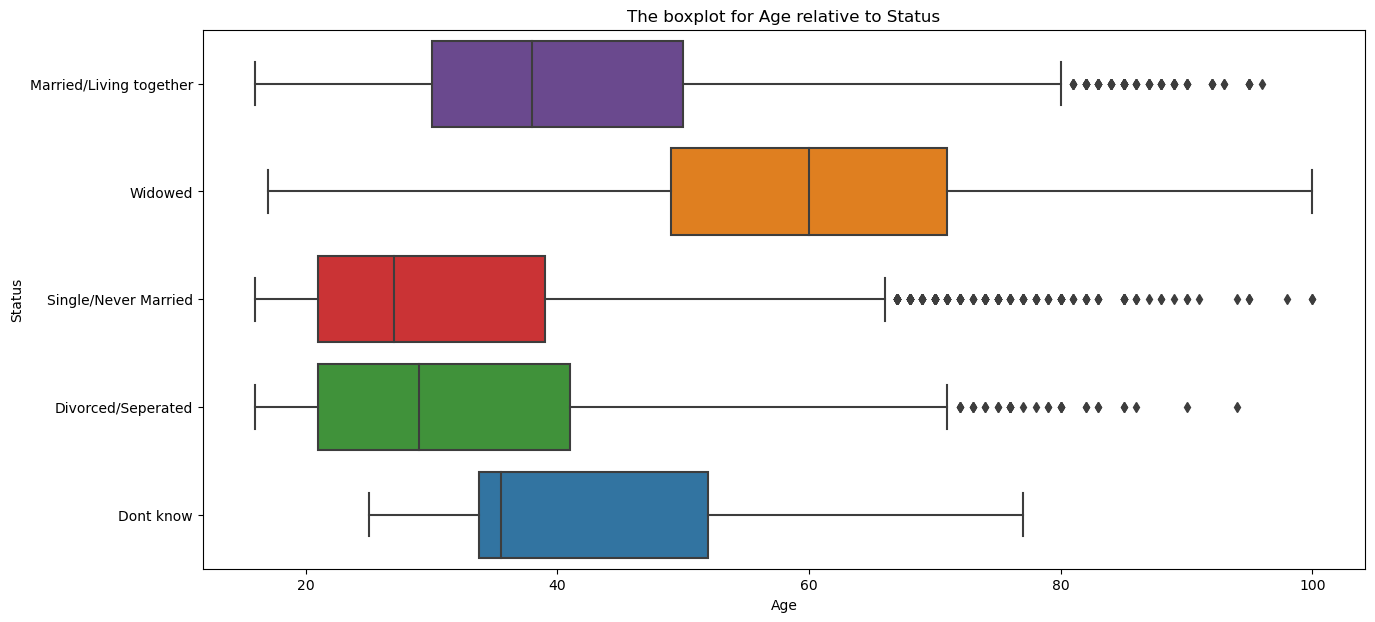

In [65]:
# Boxplot for Age relative to marital status.
box_plot(data,"Age","Status")

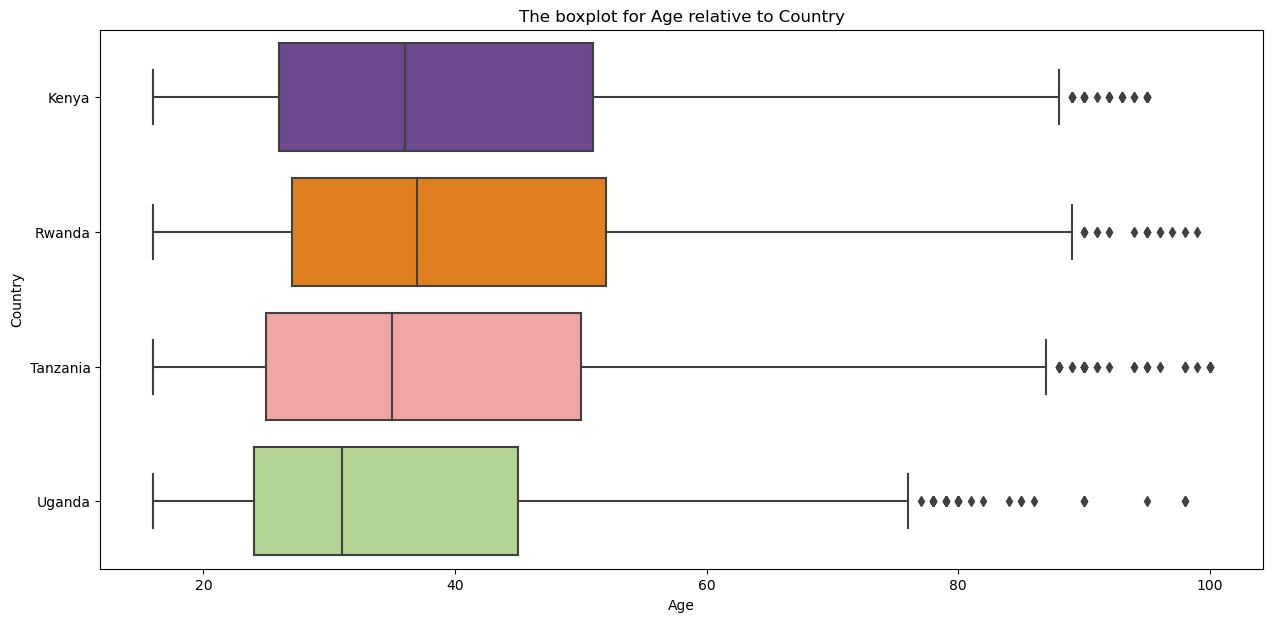

In [66]:
# Boxplot for Age relative to country.
box_plot(data,"Age","Country")

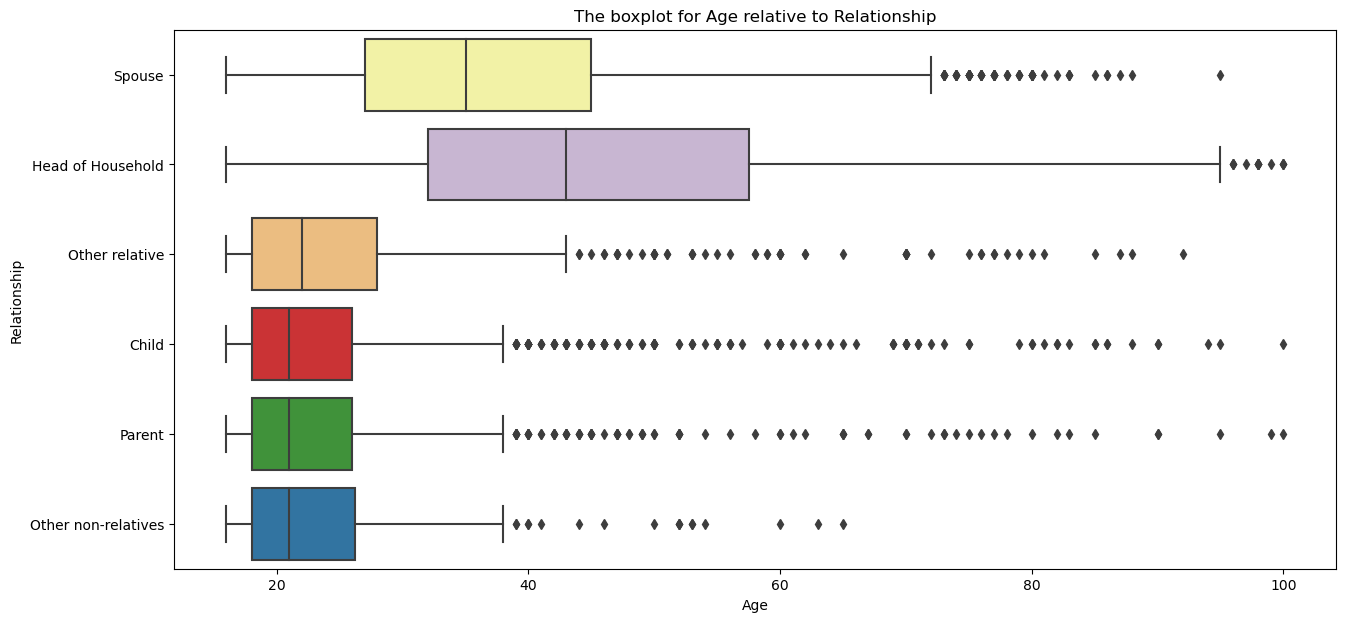

In [67]:
# Boxplot for Age relative to relationship.
box_plot(data,"Age","Relationship")

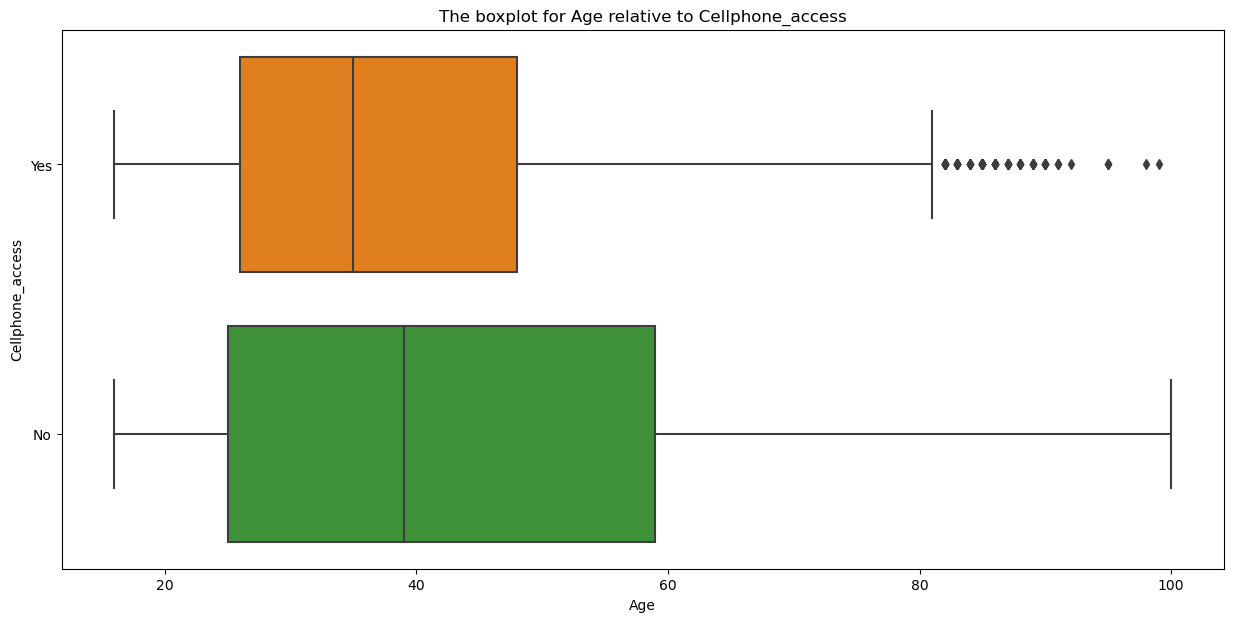

In [68]:
# Boxplot for Age relative to cellphone access.
box_plot(data,"Age","Cellphone_access")

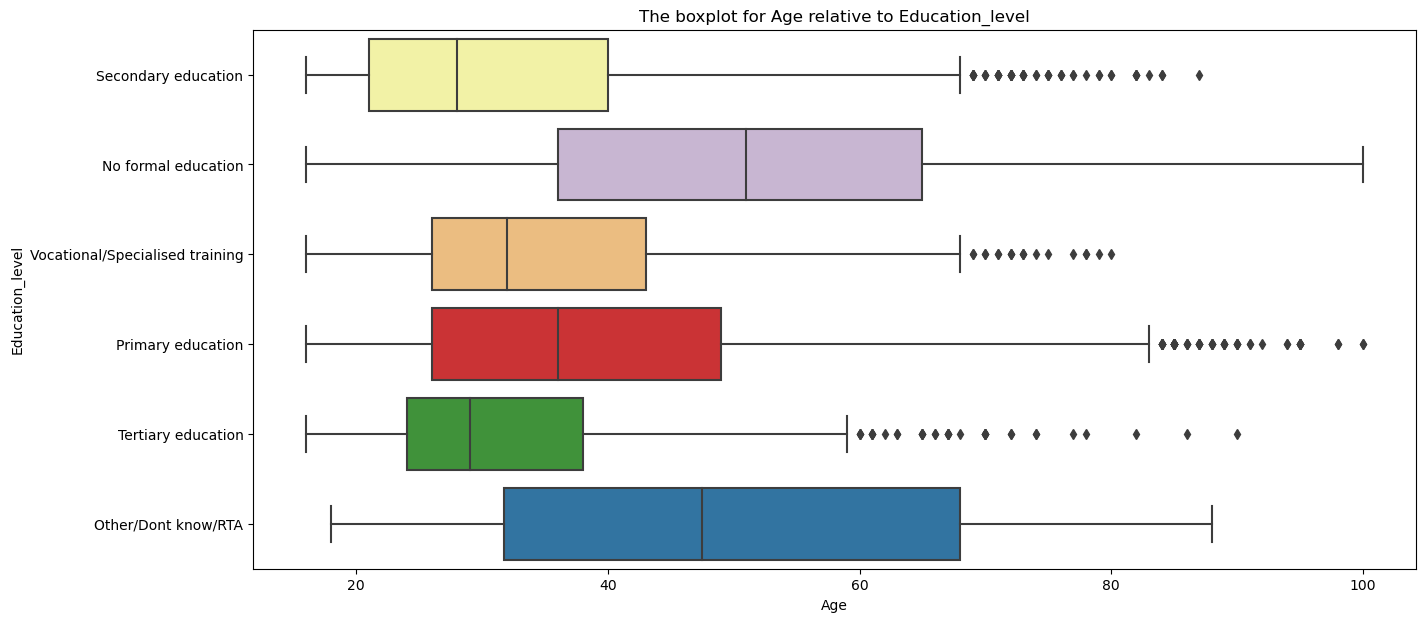

In [69]:
# Boxplot for Age relative to Education level.
box_plot(data,"Age","Education_level")

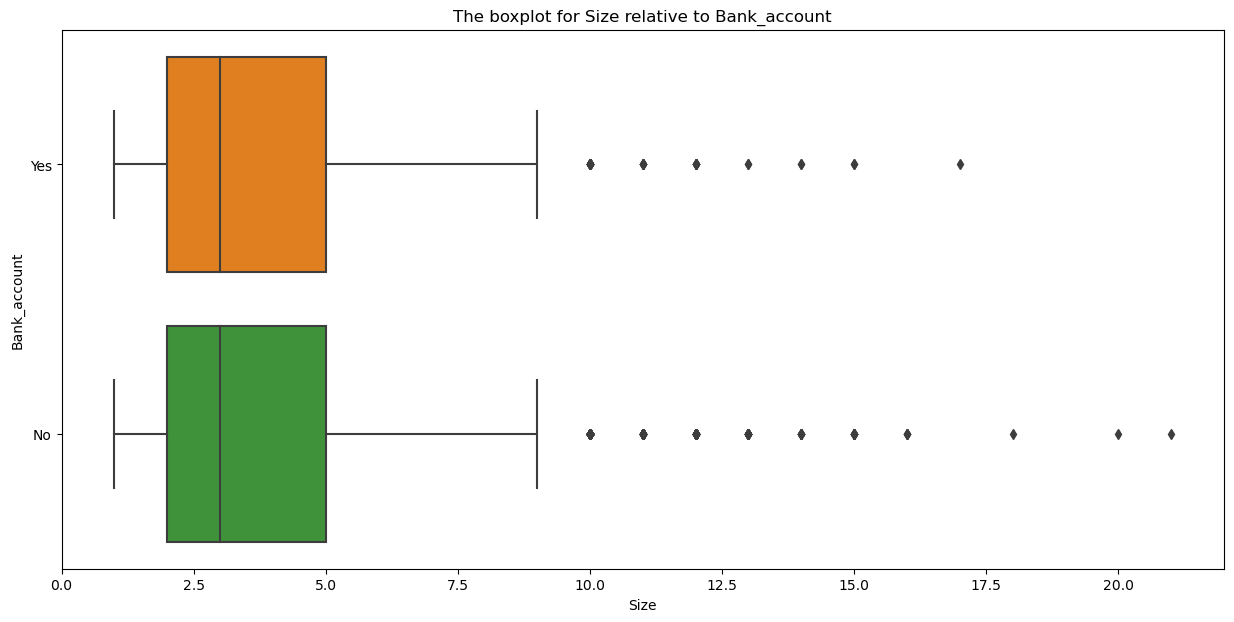

In [70]:
# Boxplot for size relative to bank account.
box_plot(data,"Size","Bank_account")

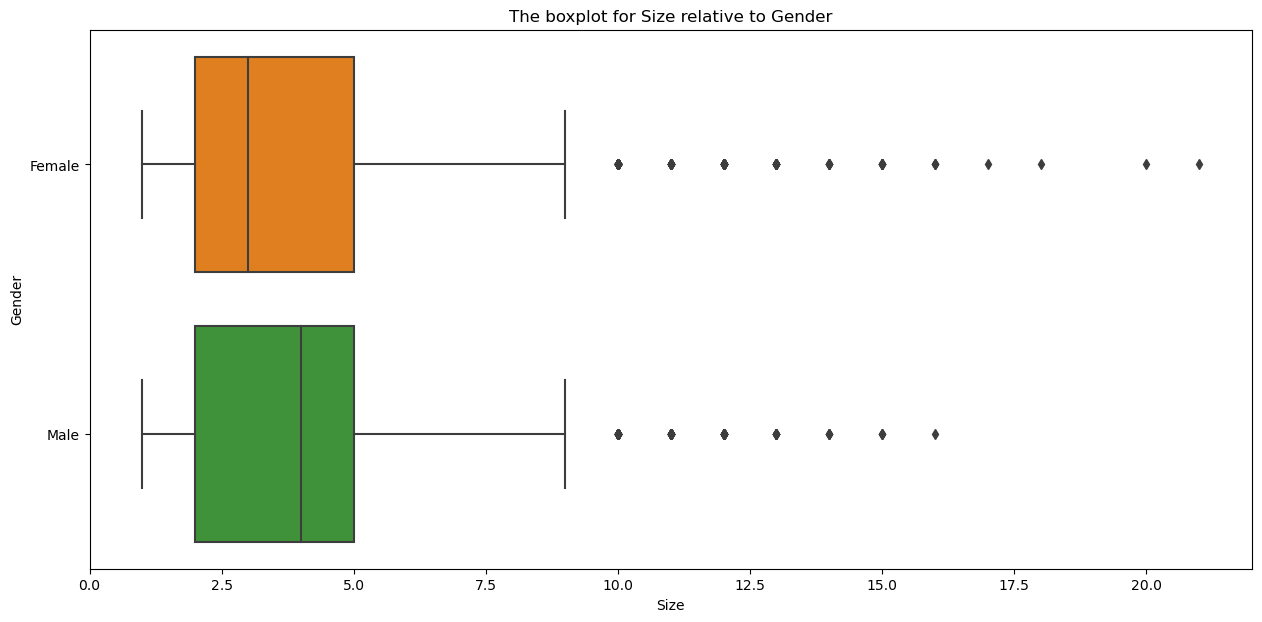

In [71]:
# Boxplot for size relative to gender.
box_plot(data,"Size","Gender")

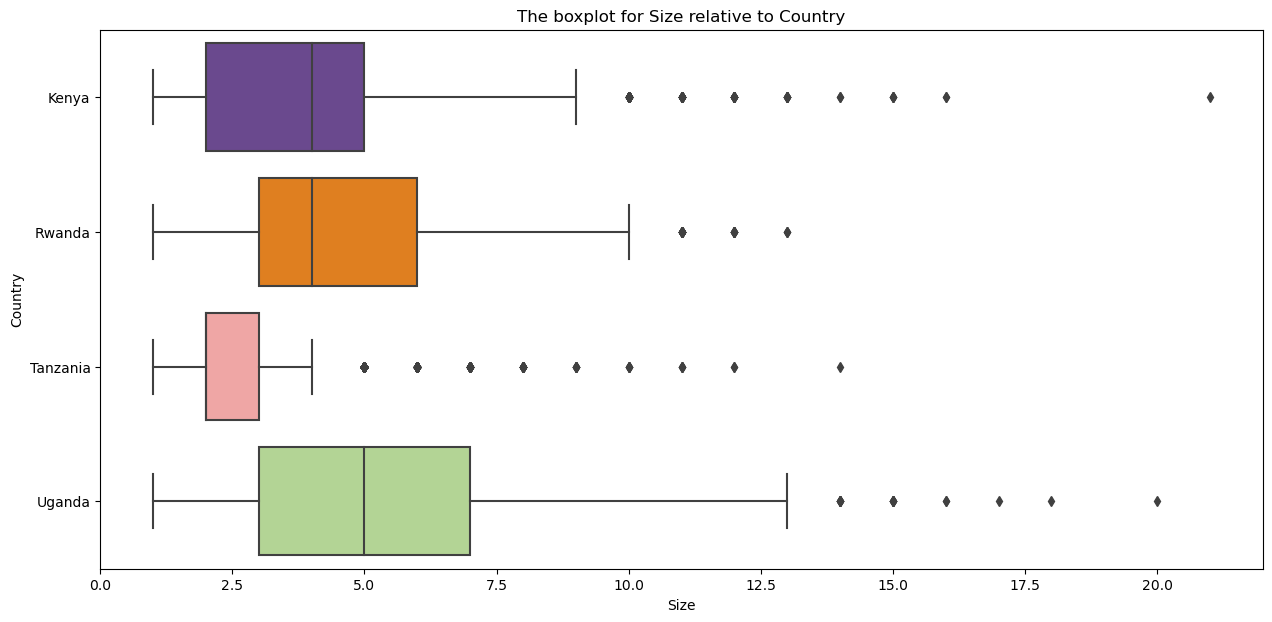

In [72]:
# Boxplot for size relative to country.
box_plot(data,"Size","Country")

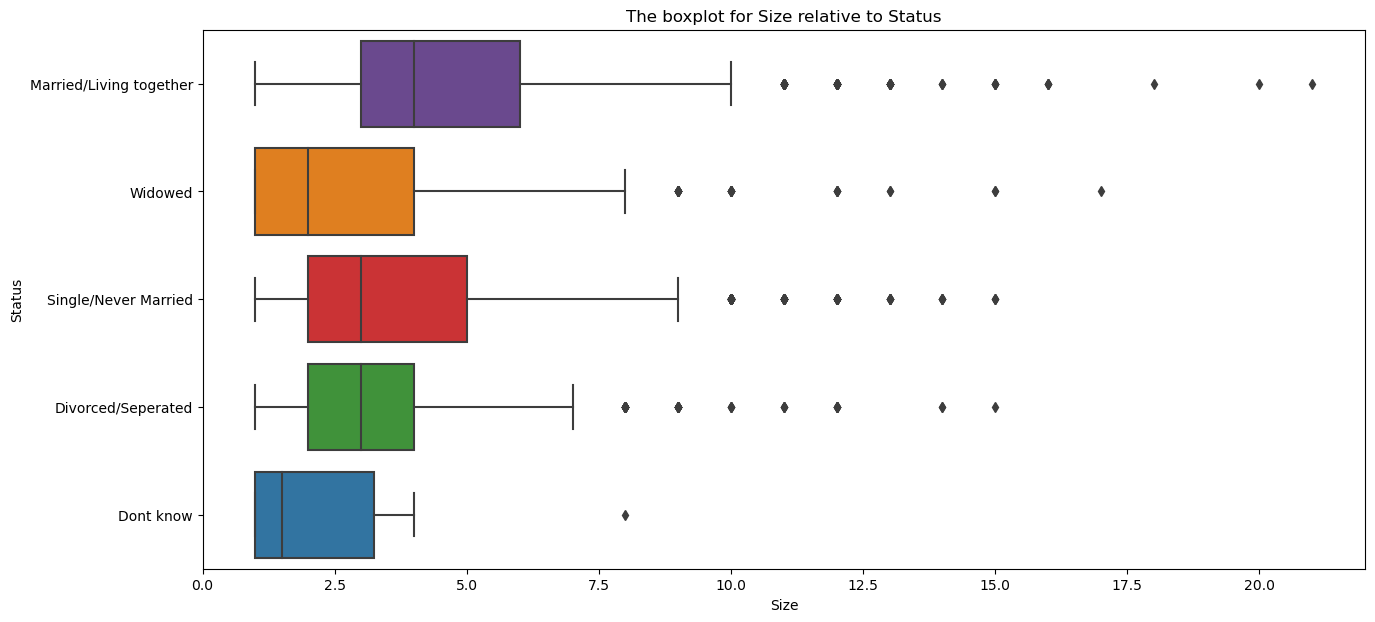

In [73]:
# Boxplot for size relative to status
box_plot(data,"Size","Status")

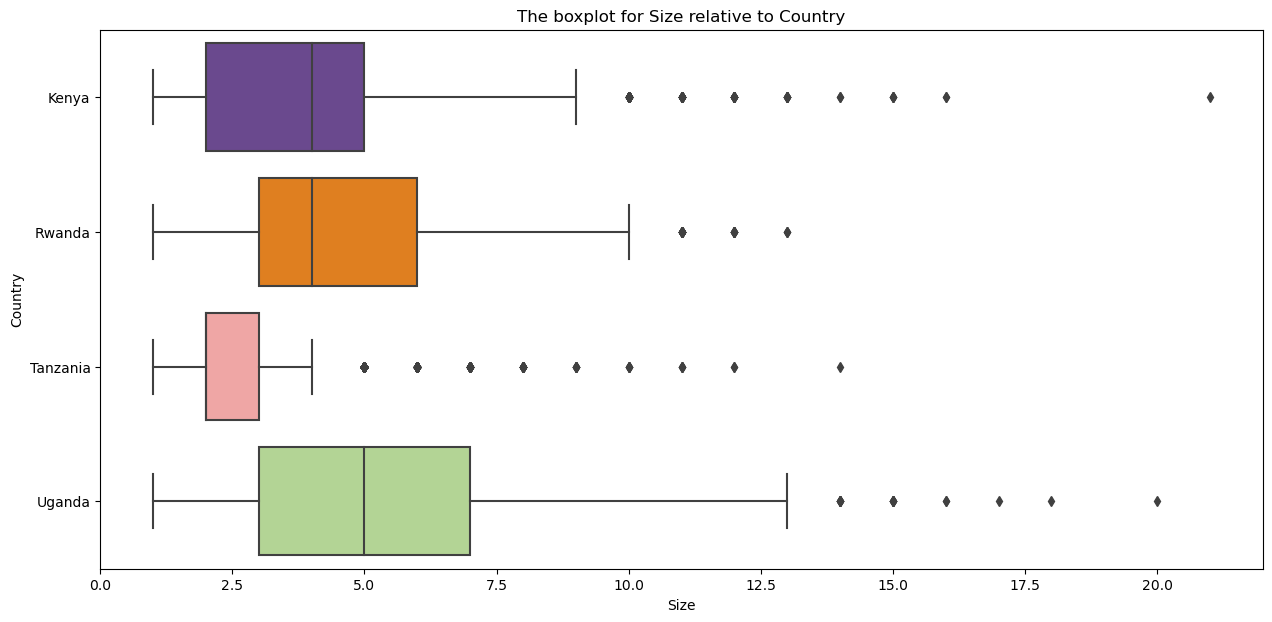

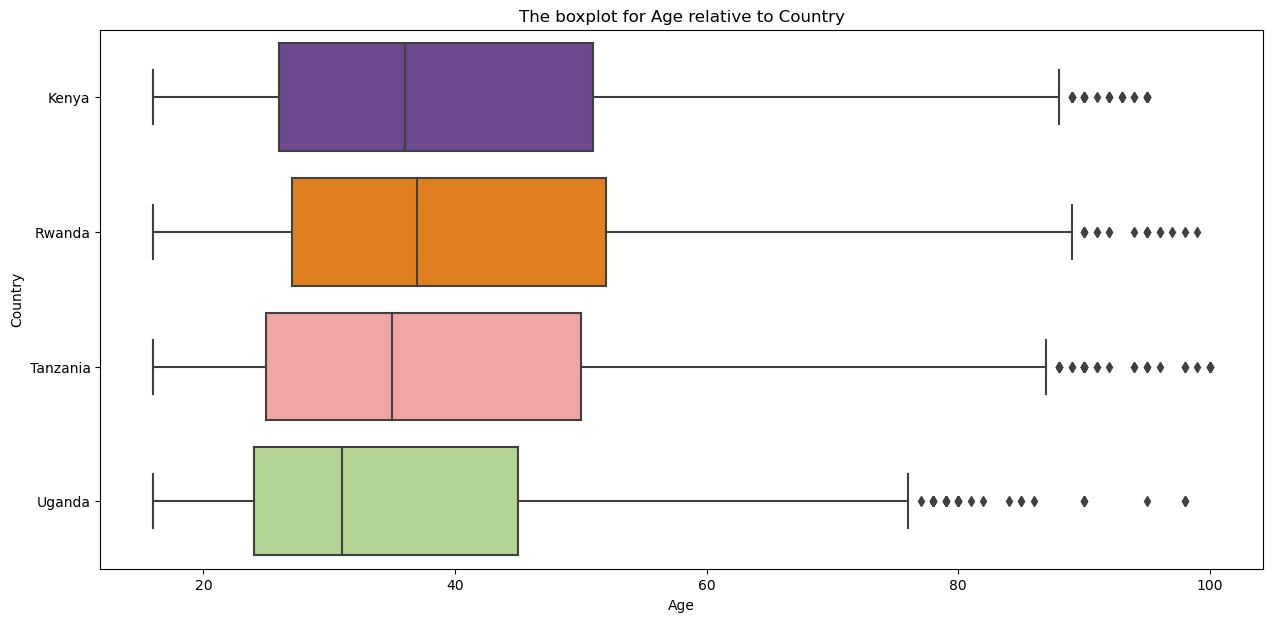

In [74]:
# Code to print the boxplot for numerical columns relative to categorical data
for variable in numerical_columns:
    box_plot(data,variable,categorical_data[0])

### Categorical data analysis only

In [75]:
## Create a function to display a countplot for bivariate categorical columns relatives to bank data
def bivariate_plot(data,item_1,item_2,color):
    plt.figure(figsize=(10,7))
    sns.countplot(x=item_1,data=data,palette=color,hue=item_2)
    plt.ylabel("frequency")
    plt.xticks(rotation=90)
    plt.show()

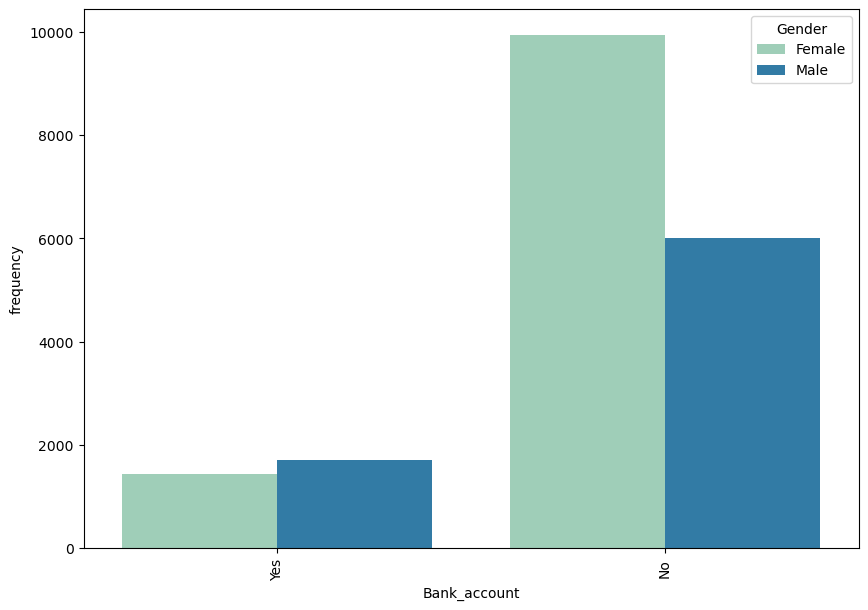

In [76]:
bivariate_plot(data,"Bank_account","Gender",color="YlGnBu")

In [77]:
round(data.groupby("Bank_account")["Gender"].value_counts(normalize=True),3)*100 

Bank_account  Gender
No            Female   62.300
              Male     37.700
Yes           Male     54.300
              Female   45.700
Name: Gender, dtype: float64

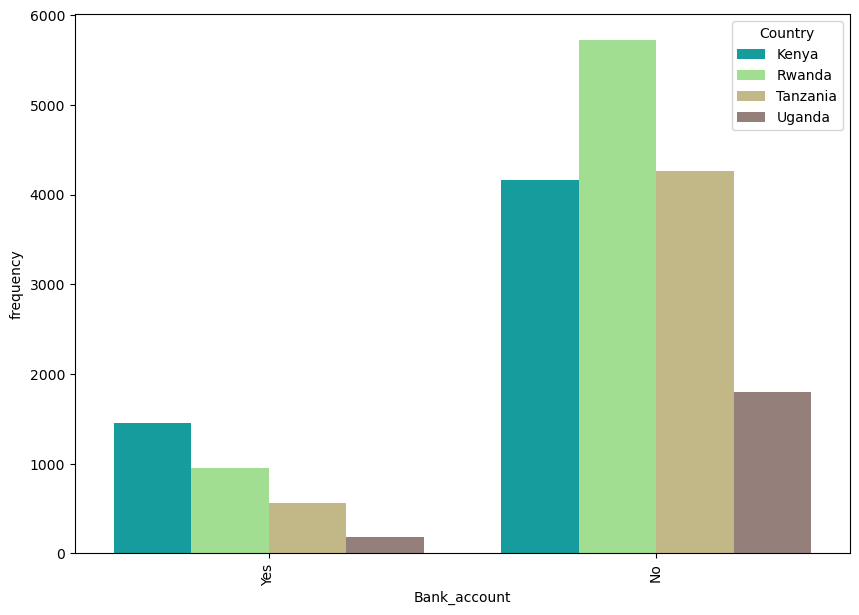

In [78]:
bivariate_plot(data,"Bank_account","Country",color="terrain")

In [79]:
round(data.groupby("Country")["Bank_account"].value_counts(normalize=True),3)*100 

Country   Bank_account
Kenya     No             74.100
          Yes            25.900
Rwanda    No             85.700
          Yes            14.300
Tanzania  No             88.300
          Yes            11.700
Uganda    No             90.900
          Yes             9.100
Name: Bank_account, dtype: float64

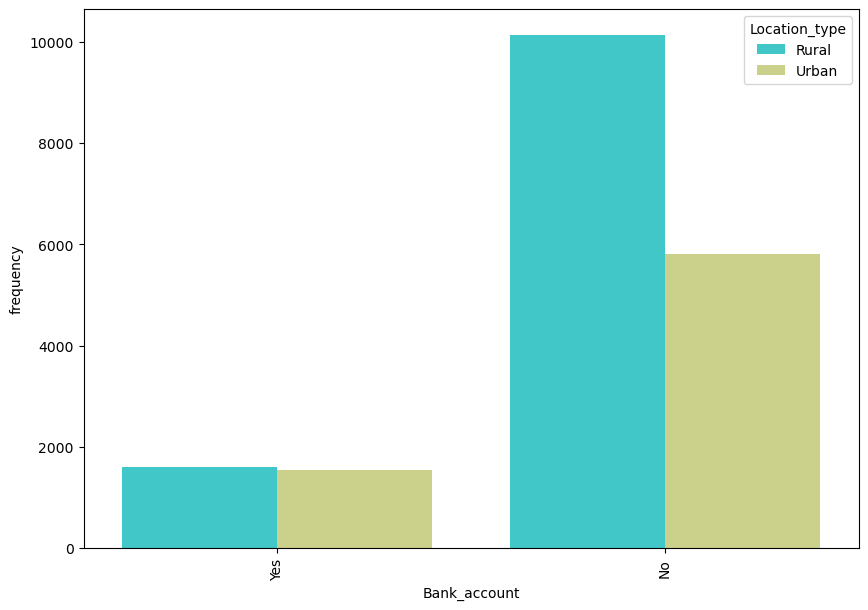

In [80]:
bivariate_plot(data,"Bank_account","Location_type",color="rainbow")

In [81]:
round(data.groupby("Bank_account")["Job_type"].value_counts(normalize=True),3)*100 

Bank_account  Job_type                    
No            Informally employed            25.700
              Self employed                  25.600
              Farming and Fishing            22.000
              Remittance Dependent           12.500
              Other Income                    5.400
              No Income                       3.500
              Formally employed Private       3.000
              Government Dependent            1.200
              Dont Know/Refuse to answer      0.700
              Formally employed Government    0.500
Yes           Self employed                  25.500
              Farming and Fishing            18.900
              Formally employed Private      17.000
              Informally employed            13.600
              Formally employed Government    9.200
              Remittance Dependent            7.200
              Other Income                    6.200
              Government Dependent            1.600
              Dont Kn

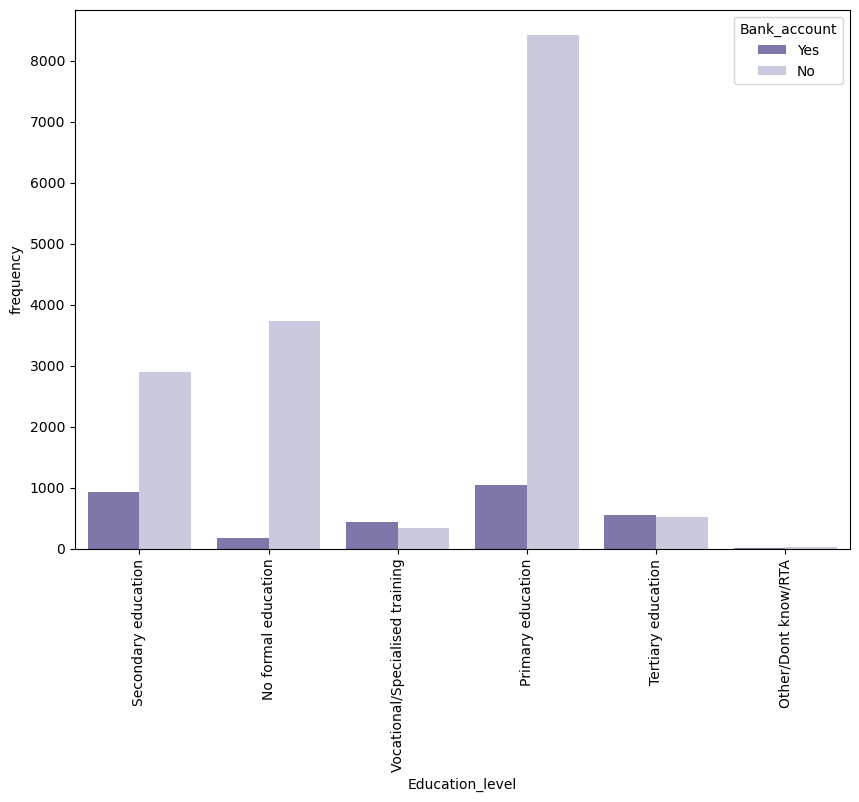

In [82]:
bivariate_plot(data,"Education_level","Bank_account",color="Purples_r")

In [83]:
round(data.groupby("Bank_account")["Education_level"].value_counts(normalize=True),3)*100 

Bank_account  Education_level                
No            Primary education                 52.800
              No formal education               23.500
              Secondary education               18.200
              Tertiary education                 3.300
              Vocational/Specialised training    2.100
              Other/Dont know/RTA                0.100
Yes           Primary education                 32.900
              Secondary education               29.300
              Tertiary education                17.700
              Vocational/Specialised training   14.100
              No formal education                5.500
              Other/Dont know/RTA                0.300
Name: Education_level, dtype: float64

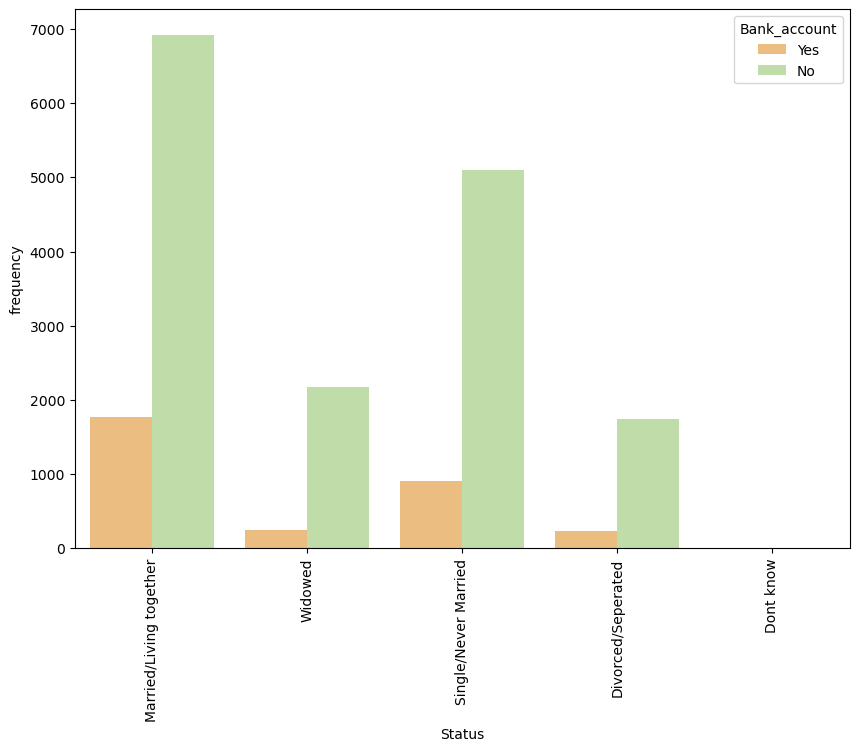

In [84]:
bivariate_plot(data,"Status","Bank_account",color="Spectral")

### Numerical data

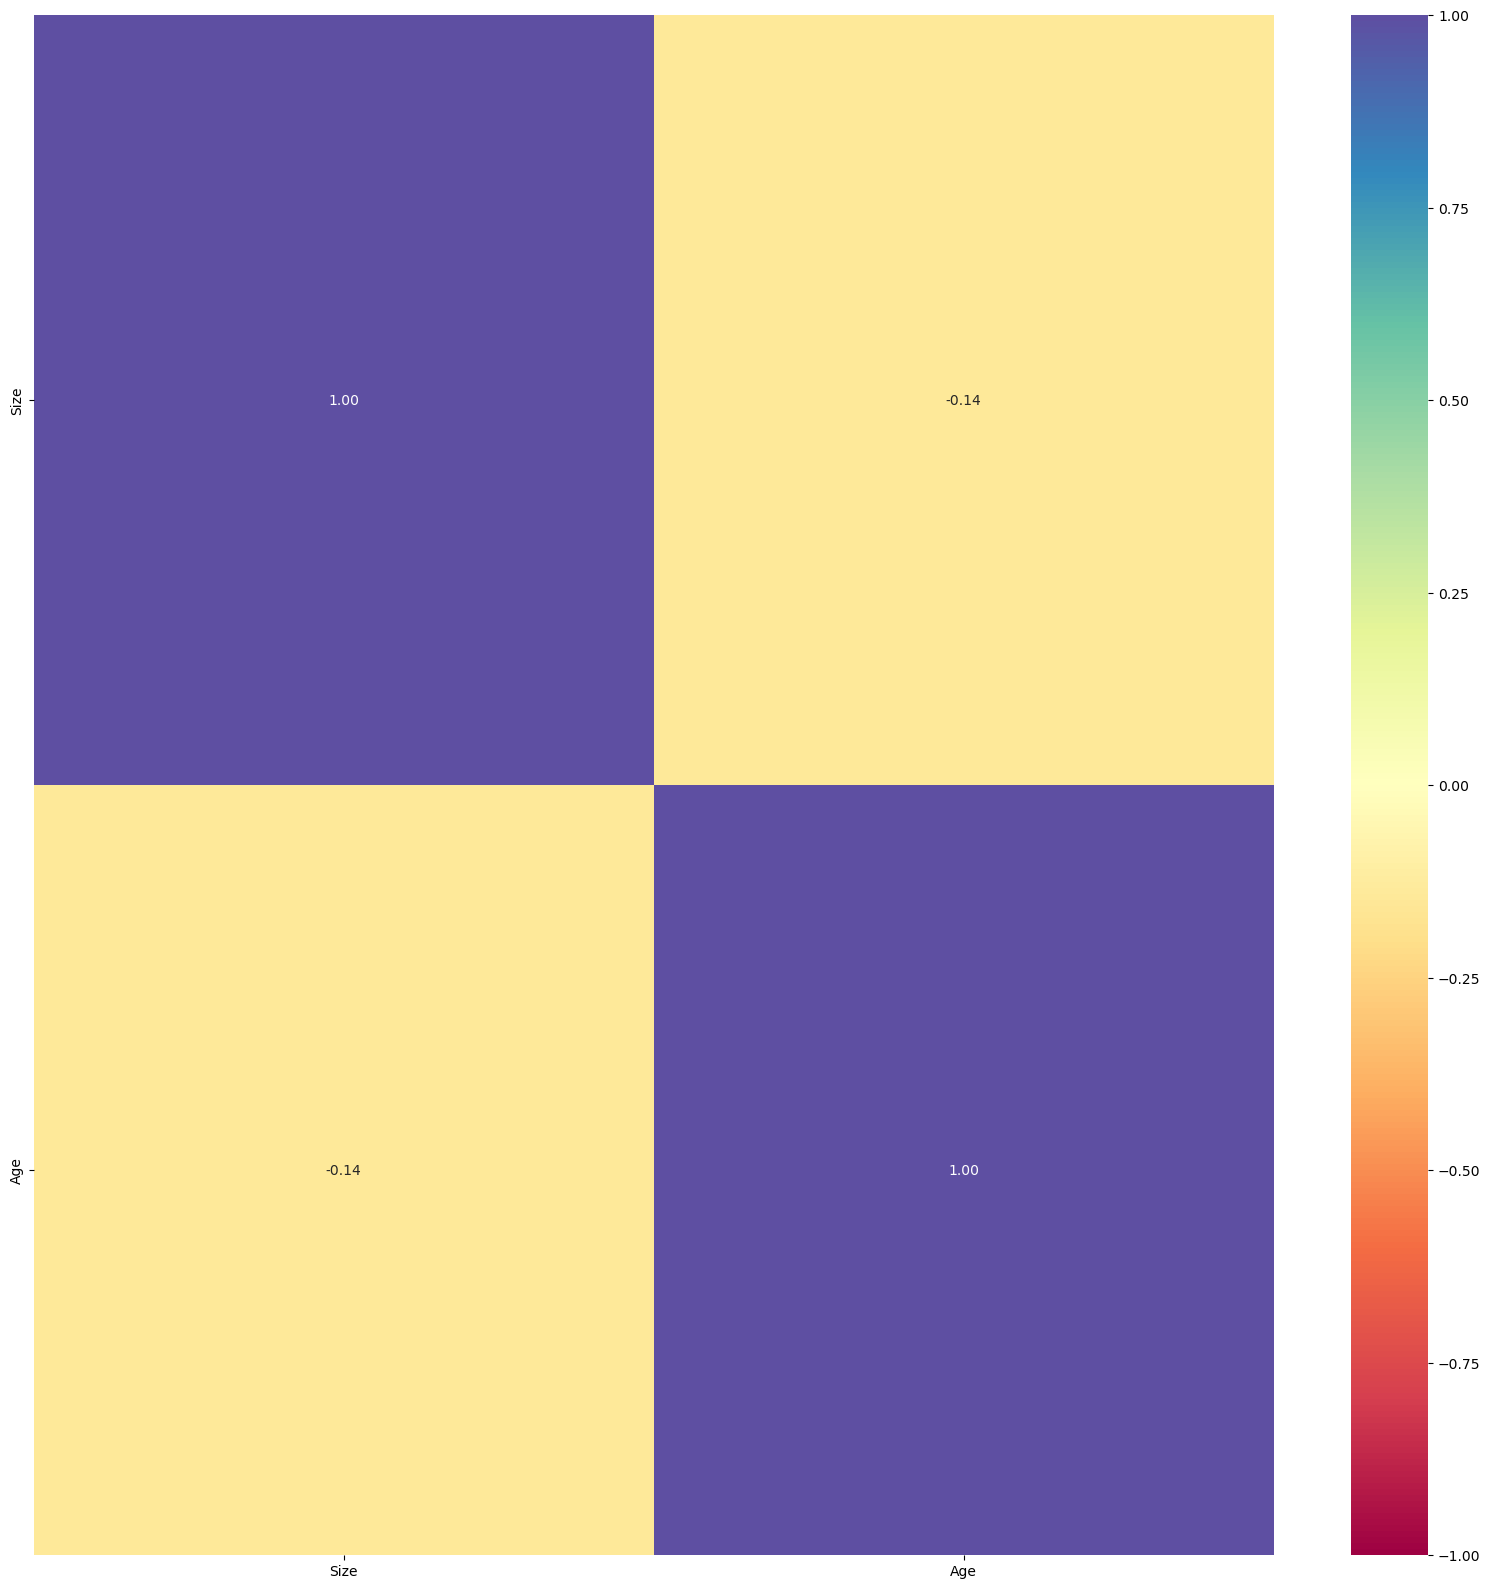

In [85]:
## Construct a correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data preprocessing

### Feature engineering

#### OUTLIER DETECTION AND TREATMENT

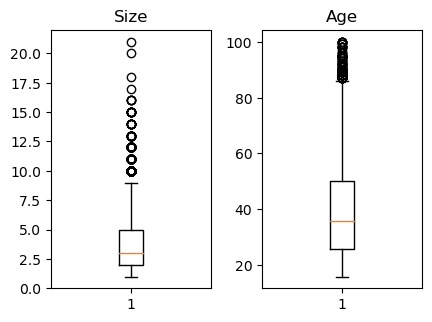

In [86]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numerical_columns):
    plt.subplot(4,7, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Treatment of Outliers
* The size and age dataset are skewed to the right with outliers on the upper whisker.
* We need to trim the data above the upper fence of the box and whisker diagram.

In [87]:
## Select the numerical dataset 
numerical_column = data.select_dtypes("number").columns 

In [88]:
print(numerical_column)

Index(['Size', 'Age'], dtype='object')


In [89]:
###  Calculate the upper ,lower and interquartile range of the numerical data with outliers.
Q1 = np.percentile(data["Size"],25,method="midpoint")
Q3 =np.percentile(data["Size"],75,method="midpoint")
IQR = Q3-Q1

Lower_fence1= Q1 -1.5*IQR
Upper_fence1 = Q3+1.5*IQR

print(f"The lower and upper fence for size dataset is {Lower_fence1} and {Upper_fence1}")

The lower and upper fence for size dataset is -2.5 and 9.5


In [90]:
###  Calculate the upper ,lower and interquartile range of the numerical data with outliers.
Q1 = data["Size"].quantile(0.25)
Q3 = data["Size"].quantile(0.75)
IQR = Q3-Q1

lower_fence1= Q1 -1.5*IQR
upper_fence1 = Q3+1.5*IQR

print(f"The lower and upper fence for size dataset is {lower_fence1} and {upper_fence1}")

The lower and upper fence for size dataset is -2.5 and 9.5


In [91]:
Q1 = np.percentile(data["Age"],25,method="midpoint")
Q3 =np.percentile(data["Age"],75,method="midpoint")
IQR = Q3-Q1
Lower_fence2 = Q1-1.5*IQR
Upper_fence2 = Q3+1.5*IQR
print(f"The  Lower and upper fence for Age dataset is {Lower_fence2} and {Upper_fence2}")

The  Lower and upper fence for Age dataset is -10.0 and 86.0


In [92]:
### Now remove outliers in both the size and Age dataset
data = data[(data["Size"]>Lower_fence1)&(data["Size"]<Upper_fence1)]

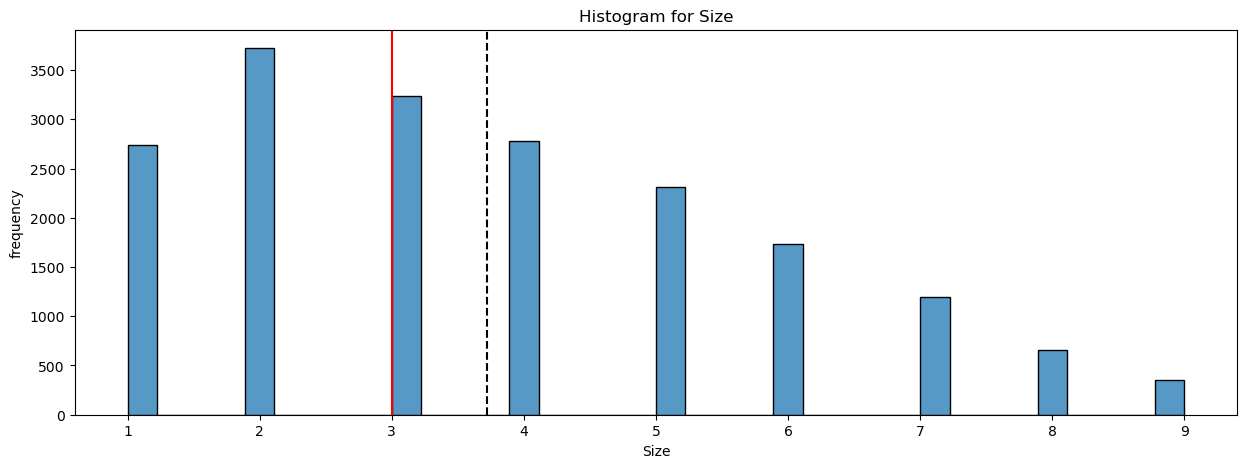

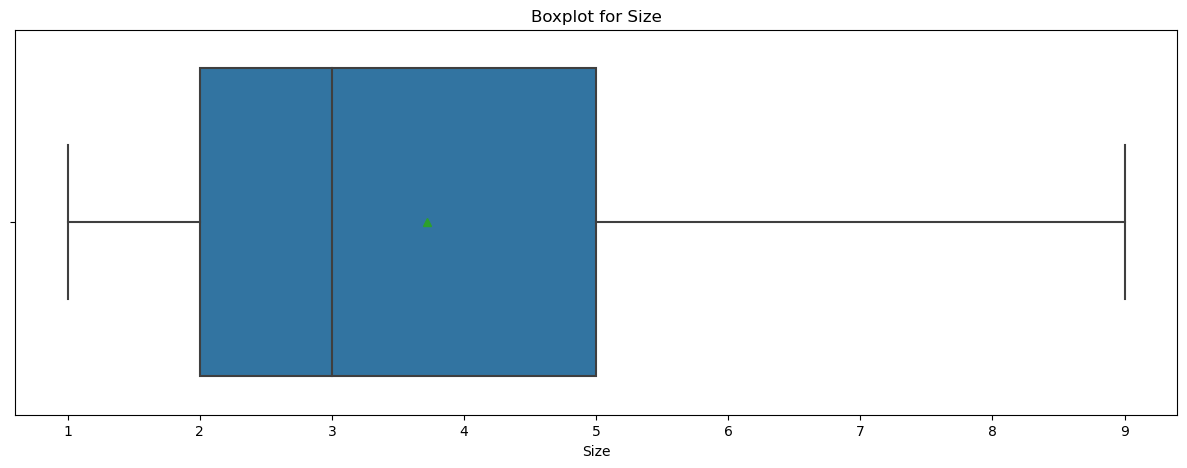

In [93]:
### Now construct the boxplot  and histogram for Size and Age dataset after outlier treatment
box_histplot(data,"Size") 

In [94]:
### Now remove outliers in  Age dataset
data = data[(data["Age"]>Lower_fence2)&(data["Age"]<Upper_fence2)]

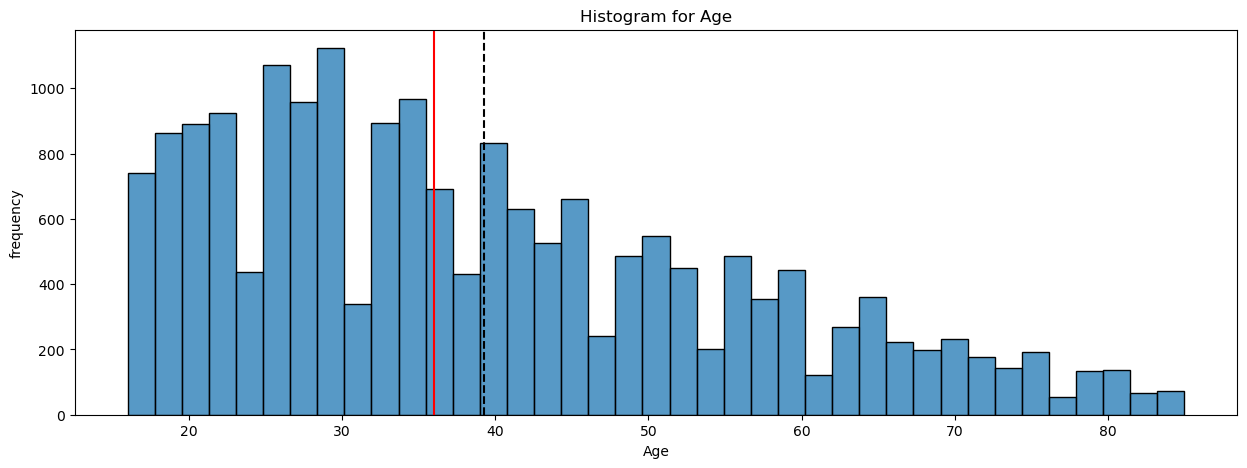

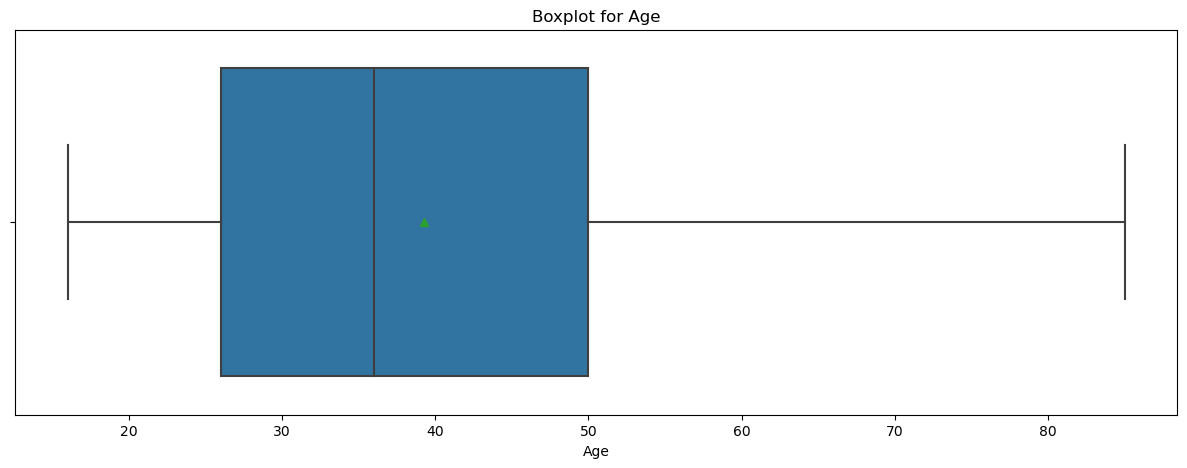

In [95]:
box_histplot(data,"Age")

### Data Preparation:

#### Convert categorical  to numerical variables

In [96]:
data1 = data.copy()

In [97]:
## Select categorical columns in the train dataset
categorical_columns_train = data1.select_dtypes("object").columns 

In [98]:
categorical_columns_train

Index(['Country', 'Bank_account', 'Location_type', 'Cellphone_access',
       'Gender', 'Relationship', 'Status', 'Education_level', 'Job_type'],
      dtype='object')

In [99]:
# first create dummy variables for categorical data by dropping one of the columns in the training data
for variable in categorical_columns_train:
    
       data1[variable] = pd.factorize(data1[variable])[0]  

In [100]:
data1.head()

,Country,Bank_account,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type
0,0,0,0,0,3,24,0,0,0,0,0
1,0,1,0,1,5,70,0,1,1,1,1
2,0,0,1,0,5,26,1,2,2,2,0
3,0,1,0,0,5,34,0,1,0,3,2
4,0,1,1,1,8,26,1,3,2,3,3


In [101]:
data1.shape

(18562, 11)

In [102]:
## Count the number of units in the banking account columns
data1["Bank_account"].value_counts(normalize=True)

1   0.833
0   0.167
Name: Bank_account, dtype: float64

### Observation:
The banking account column contain unbalanced data.

### Split the data into train and test sets

In [103]:
# Dividing train data into X and y 
X = data1.drop(["Bank_account"], axis=1)
y = data1["Bank_account"]

In [104]:
X.shape

(18562, 10)

In [105]:
X.head()

,Country,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type
0,0,0,0,3,24,0,0,0,0,0
1,0,0,1,5,70,0,1,1,1,1
2,0,1,0,5,26,1,2,2,2,0
3,0,0,0,5,34,0,1,0,3,2
4,0,1,1,8,26,1,3,2,3,3


In [106]:
# Splitting the dataset into training and validation set into a ratio of 70:30 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30,random_state=42)

In [107]:
print(f"The training dataset consits of {X_train.shape[0]} rows and {X_train.shape[1]} columns")

The training dataset consits of 12993 rows and 10 columns


In [108]:
print(f"The validation dataset consists of {X_val.shape[0]} rows and {X_val.shape[1]} columns")

The validation dataset consists of 5569 rows and 10 columns


### Normalize/standardize the data

In [109]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Cleaning the testing dataset

In [110]:
### Cleaning the testing dataset
# Create a copy of the original dataset
data_test = test_data.copy()
# Drop the Year and UniqueID columns
data_test= data_test.drop(columns=["Year","UniqueID"],axis=1)
# Now select the categorical columns in the testing dataset
categorical_test_column = data_test.select_dtypes("object").columns
# Now create the dummy variables on the categorical columns
for variable in categorical_test_column:
    
       data_test[variable] = pd.factorize(data_test[variable])[0]  

In [111]:
data_test.head()

,Country,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type
0,0,0,0,3,30,0,0,0,0,0
1,0,0,0,7,51,0,0,0,1,1
2,0,1,1,3,77,1,1,0,2,2
3,0,1,1,6,39,1,0,0,3,2
4,0,0,1,3,16,0,2,1,0,2


In [112]:
data_test.shape

(10086, 10)

In [113]:
X_test = data_test

In [114]:
### Now normalize the testing dataset
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

### Model Building

## Performance measures description:
* Mean Absolute Error: The sum of the absolute difference of the predicted values and the target values divided by the number of observations. <br>
* The lower the mean absolute error the good model to use for prediction.<br>
* True positive(TP): The model predict that the respondent has a bank account(Yes) and in reality he/she has the bank account(Yes).<br>
* False positive(FP): The model predict that the respondent has a bank account(Yes) and in reality it there is no bank account(No).<br>
* False negative(FN): The model predict that the respondent has no bank account(No) and the reality there is bank account(Yes).<br>
* True negative(TN): The model predict no bank account(No) and in reality there is no bank account(No).<br>
* Accuracy = (TP+TN)/(TP+FP+FN+TN)
* Recall =(TP)/(TP+FN)
* Precision =(FP/FP+TN)
* F1 score: This score minimize both the False negative(FN) and False Positive(FN),the higher the better
* The values can computed using a confusion matrix

In [115]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        mae = mean_absolute_error(target,pred)  # to compute the mean absolute error using the target and predicted values
        acc = accuracy_score(target, pred)  # to compute Accuracy using target and predicted values
        recall = recall_score(target, pred)  # to compute Recall using target and predicted values
        precision = precision_score(target, pred)  # to compute Precision using target and predicted values
        f1 = f1_score(target, pred)  # to compute F1-score using target and predicted values

        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Mean absolute error":mae,"Accuracy": acc,"Recall": recall,"Precision": precision,"F1": f1},index=[0],)

        return df_perf

In [116]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building on original data

In [117]:
models = {
    "Logistic Regression": LogisticRegression(),
     "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Ada boost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
}

for name, model in models.items():
    scores = cross_val_score(estimator=model, X=X_train,y=y_train,scoring="recall",cv=3)
    print(f"{name} recall: {round(np.mean(scores),4)}")

Logistic Regression recall: 0.9917
K-Nearest Neighbors recall: 0.9476
Decision Tree recall: 0.855
Random Forest recall: 0.9341
Bagging recall: 0.9028
Gradient Boosting recall: 0.9728
Ada boost recall: 0.972
Support Vector Machine recall: 0.9877


In [118]:
## Check the performamce for each model in the training data
logistic_train_perf = model_performance_classification_sklearn(models["Logistic Regression"].fit(X_train,
                        y_train),X_train,y_train)
kneighbor_train_perf = model_performance_classification_sklearn(models["K-Nearest Neighbors"].fit(X_train,
                        y_train),X_train,y_train)
decisiontree_train_perf = model_performance_classification_sklearn(models["Decision Tree"].fit(X_train,
                        y_train),X_train,y_train)
randomf_train_perf = model_performance_classification_sklearn(models["Random Forest"].fit(X_train,
                        y_train),X_train,y_train)
bagging_train_perf = model_performance_classification_sklearn(models["Bagging"].fit(X_train,
                        y_train),X_train,y_train)
gradient_train_perf = model_performance_classification_sklearn(models["Gradient Boosting"].fit(X_train,
                        y_train),X_train,y_train)
adaboost_train_perf = model_performance_classification_sklearn(models["Ada boost"].fit(X_train,
                        y_train),X_train,y_train)
svm_train_perf = model_performance_classification_sklearn(models["Support Vector Machine"].fit(X_train,
                        y_train),X_train,y_train)

In [119]:
### Display the peformance measures for each model
models_train_comp_df = pd.concat([logistic_train_perf.T, kneighbor_train_perf.T,decisiontree_train_perf.T,
randomf_train_perf.T, bagging_train_perf.T, gradient_train_perf.T, adaboost_train_perf.T, svm_train_perf.T],axis=1,)
models_train_comp_df.columns = [
    "Logistic ","KNeighbor","DecisionTree","Random forest","Bagging","Gradient boost","Adaboost","SVM"]


In [120]:
print("Training performance measures comparison")
models_train_comp_df

Training performance measures comparison


,Logistic,KNeighbor,DecisionTree,Random forest,Bagging,Gradient boost,Adaboost,SVM
Mean absolute error,0.164,0.123,0.017,0.017,0.025,0.130,0.142,0.155
Accuracy,0.836,0.877,0.983,0.983,0.975,0.870,0.858,0.845
Recall,0.991,0.970,0.979,0.995,0.989,0.973,0.971,0.988
Precision,0.841,0.891,1.000,0.984,0.981,0.882,0.873,0.850
F1,0.910,0.929,0.989,0.990,0.985,0.926,0.920,0.914


### Observation:



In [121]:
## Check the performamce for each model in the validation data
logistic_val_perf = model_performance_classification_sklearn(models["Logistic Regression"].fit(X_val,
                        y_val),X_val,y_val)
kneighbor_val_perf = model_performance_classification_sklearn(models["K-Nearest Neighbors"].fit(X_val,
                        y_val),X_val,y_val)
decisiontree_val_perf = model_performance_classification_sklearn(models["Decision Tree"].fit(X_val,
                        y_val),X_val,y_val)
randomf_val_perf = model_performance_classification_sklearn(models["Random Forest"].fit(X_val,
                        y_val),X_val,y_val)
bagging_val_perf = model_performance_classification_sklearn(models["Bagging"].fit(X_val,
                        y_val),X_val,y_val)
gradient_val_perf = model_performance_classification_sklearn(models["Gradient Boosting"].fit(X_val,
                        y_val),X_val,y_val)
adaboost_val_perf = model_performance_classification_sklearn(models["Ada boost"].fit(X_val,
                        y_val),X_val,y_val)
svm_val_perf = model_performance_classification_sklearn(models["Support Vector Machine"].fit(X_val,
                        y_val),X_val,y_val)

In [122]:
### Display the peformance measures for each model
models_validation_comp_df = pd.concat([logistic_val_perf.T, kneighbor_val_perf.T,decisiontree_val_perf.T,
randomf_val_perf.T, bagging_val_perf.T, gradient_val_perf.T, adaboost_val_perf.T, svm_val_perf.T],axis=1,)
models_validation_comp_df.columns = [
    "Logistic ","KNeighbor","DecisionTree","Random forest","Bagging","Gradient boost","Adaboost","SVM"]


In [123]:
print("Validation performance measures comparison")
models_validation_comp_df

Validation performance measures comparison


,Logistic,KNeighbor,DecisionTree,Random forest,Bagging,Gradient boost,Adaboost,SVM
Mean absolute error,0.164,0.124,0.009,0.009,0.018,0.124,0.136,0.163
Accuracy,0.836,0.876,0.991,0.991,0.982,0.876,0.864,0.837
Recall,0.988,0.971,0.989,0.997,0.991,0.971,0.968,0.995
Precision,0.842,0.890,1.000,0.993,0.987,0.890,0.880,0.839
F1,0.909,0.929,0.995,0.995,0.989,0.929,0.922,0.911


### Observation:


## Hyperparameter Tuning

### Tuning Decision tree  model using original dataset

In [124]:
%%time 
# defining model
decision_model_tuned = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1,4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=decision_model_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train,y_train)
# Set the clf to the best combination of parameters and fit the tuned model
decision_model_tuned=randomized_cv.best_estimator_

CPU times: total: 438 ms
Wall time: 24.3 s


In [125]:
## Code to check the performance on the oversampled training set
decisiontree_train_perf = model_performance_classification_sklearn(decision_model_tuned, X_train, y_train)

In [126]:
## Code to check the performance on validation
decisiontree_val_perf = model_performance_classification_sklearn(decision_model_tuned,X_val,y_val) 

In [127]:
performance_on_decisiontr=pd.concat([decisiontree_train_perf.T,decisiontree_val_perf.T],axis=1)
performance_on_decisiontr.columns=["Performance on training data after tuning","Performance on validation dataset after tuning"]

In [128]:
print("Decision tree performance measures after model tuning")
performance_on_decisiontr

Decision tree performance measures after model tuning


,Performance on training data after tuning,Performance on validation dataset after tuning
Mean absolute error,0.154,0.155
Accuracy,0.846,0.845
Recall,0.994,0.990
Precision,0.847,0.849
F1,0.915,0.914


### Tuning random forest model using original dataset

In [129]:
%%time 
# defining model
random_forest_tuned = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid=  {"n_estimators": [200,250,300],"min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],"max_samples": np.arange(0.4, 0.7, 0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=random_forest_tuned, param_distributions=param_grid, scoring=scorer, n_iter=10, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train,y_train)
# Set the clf to the best combination of parameters and fit the tuned model
random_forest_tuned=randomized_cv.best_estimator_
random_forest_tuned.fit(X_train,y_train)

CPU times: total: 6.44 s
Wall time: 1min 39s


RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=250,
                       random_state=1)

In [130]:
## Code to check the performance on the training data
random_train_perf =model_performance_classification_sklearn(random_forest_tuned , X_train, y_train) 

In [131]:
## Code to check the performance on validation data
random_val_perf = model_performance_classification_sklearn(random_forest_tuned , X_val, y_val) 

In [132]:
performance_on_randomf=pd.concat([random_train_perf.T,random_val_perf.T],axis=1)
performance_on_randomf.columns=["Performance on training data after tuning","Performance on validation dataset after tuning"]

In [133]:
print("Random forest performance measures after model tuning")
performance_on_randomf

Random forest performance measures after model tuning


,Performance on training data after tuning,Performance on validation dataset after tuning
Mean absolute error,0.118,0.138
Accuracy,0.882,0.862
Recall,0.987,0.976
Precision,0.884,0.874
F1,0.933,0.922


### Tuning Bagging model using original dataset

In [134]:
%%time 
# defining model
bagging_tuned = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70]} 
    
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=bagging_tuned, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train,y_train)
# Set the clf to the best combination of parameters and fit the tuned model
bagging_tuned=randomized_cv.best_estimator_
bagging_tuned.fit(X_train,y_train)

CPU times: total: 1.17 s
Wall time: 41.1 s


BaggingClassifier(max_features=0.8, max_samples=1, n_estimators=70,
                  random_state=1)

In [135]:
## Code to check the performance on the  training set
bagging_train_perf = model_performance_classification_sklearn(bagging_tuned,X_train,y_train)

In [136]:
## Code to check the performance on validation data
bagging_val_perf = model_performance_classification_sklearn(bagging_tuned , X_val, y_val) 

In [137]:
performance_on_bagging=pd.concat([bagging_train_perf.T,bagging_val_perf.T],axis=1)
performance_on_bagging.columns=["Performance on training data after tuning","Performance on validation dataset after tuning"]

In [138]:
print("Bagging performance measures after model tuning")
performance_on_bagging

Bagging performance measures after model tuning


,Performance on training data after tuning,Performance on validation dataset after tuning
Mean absolute error,0.167,0.166
Accuracy,0.833,0.834
Recall,1.000,1.000
Precision,0.833,0.834
F1,0.909,0.909


### Feature Importances

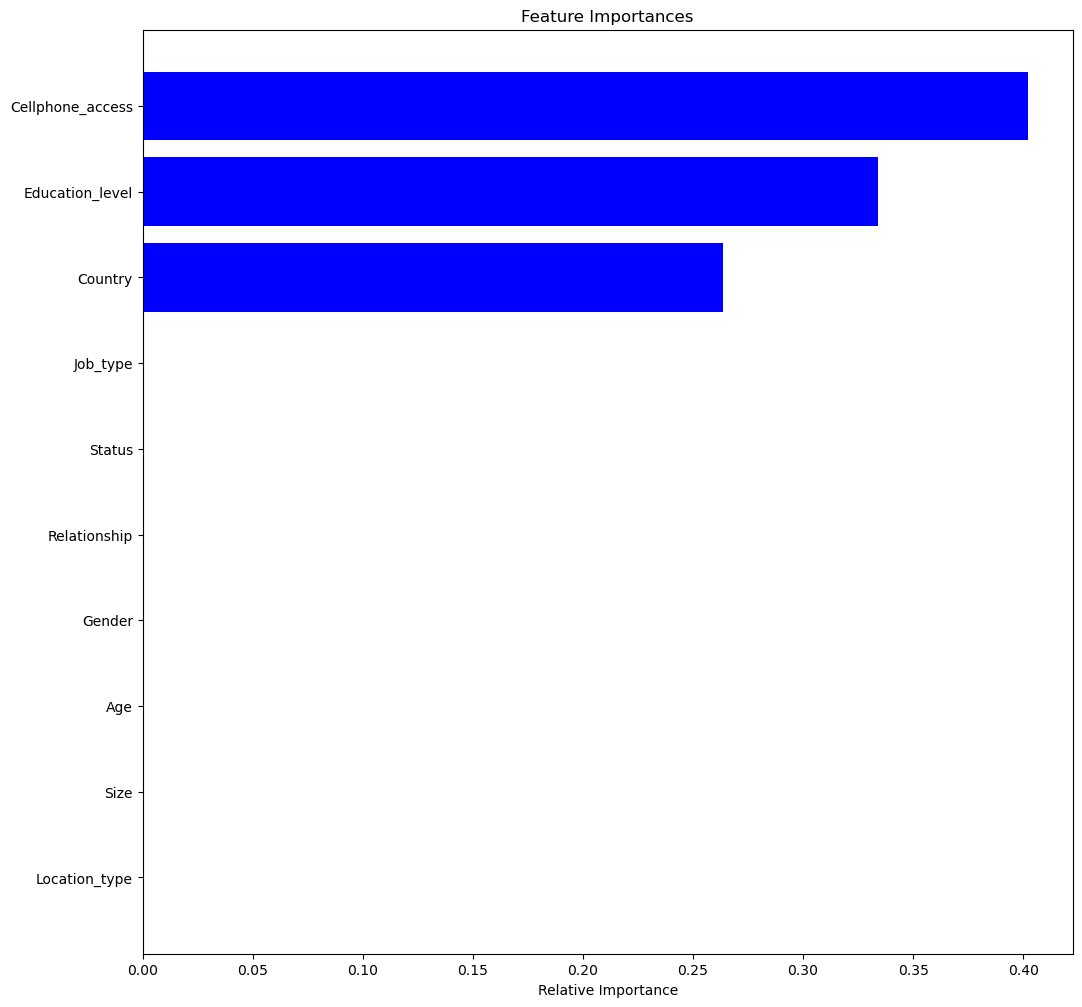

In [139]:
 ## Code to check the feature importance on the best model
feature_names = X.columns
importances =  decision_model_tuned.feature_importances_  
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [140]:
# Code to the predict the bank account
bank_account_pred = decision_model_tuned.predict(X_test)

In [141]:
df_series =pd.Series(bank_account_pred)

In [142]:
df_series.value_counts()

1    9886
0     200
dtype: int64

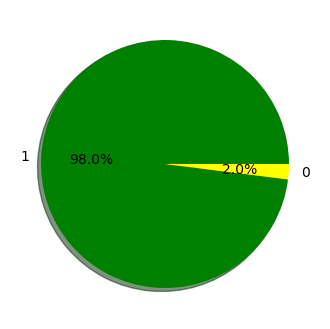

In [143]:
## Construct a pie chart for the predicted attrition. 
plt.figure(figsize=(4,5))
values = df_series.value_counts() /df_series.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True,colors=["green","yellow"])
plt.show()

In [144]:
test_data.head()

,Country,Year,UniqueID,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [145]:
data_pred = test_data

In [146]:
# Code   to predict  the target  variable using the best model on the  testing dataset
data_pred["bank_acount"] = decision_model_tuned.predict(X_test)

In [147]:
data_pred.head()

,Country,Year,UniqueID,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type,bank_acount
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,1
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,1
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,1


In [148]:
data_columns = data_pred.columns

In [149]:
data_columns

Index(['Country', 'Year', 'UniqueID', 'Location_type', 'Cellphone_access',
       'Size', 'Age', 'Gender', 'Relationship', 'Status', 'Education_level',
       'Job_type', 'bank_acount'],
      dtype='object')

In [150]:
## Make a copy of the predicted dataset
data_pred1 =data_pred.copy()

In [151]:
### Concatenate the country and Uniqueid Columns
data_pred1["unique_id"]= data_pred1["UniqueID"]   + " x " +   data_pred1["Country"]

In [152]:
data_pred1.head()

,Country,Year,UniqueID,Location_type,Cellphone_access,Size,Age,Gender,Relationship,Status,Education_level,Job_type,bank_acount,unique_id
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1,uniqueid_6056 x Kenya
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1,uniqueid_6060 x Kenya
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,1,uniqueid_6065 x Kenya
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,1,uniqueid_6072 x Kenya
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,1,uniqueid_6073 x Kenya


In [154]:
data_df =pd.DataFrame({"Uniqueid_and_Country":data_pred1["unique_id"],"bank_account":data_pred1["bank_acount"]})

In [155]:
data_df.head()

,Uniqueid_and_Country,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,1
3,uniqueid_6072 x Kenya,1
4,uniqueid_6073 x Kenya,1


In [157]:
 # code to save the predicted dataset as a csv file
data_df.to_csv("Submission_file.csv",index=False)   # code to save the predicted values as a csv file